# Mod 4 - Natural Language Processing Project

Please fill out:
* Student name: Max Steele
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: <a href=""></a>

<font size=3rem>
    
- **[Introduction](#Introduction)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[INTERPRET](#INTERPRET)**<br>
- **[Conclusions/Recommendations](#Conclusions/Recommendations)<br>**
</font>

# Introduction

# OBTAIN

In [1]:
import numpy as np
np.random.seed(319)

In [2]:
from project_functions import *

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from tzlocal import get_localzone

In [4]:
## Import and preview dataset
full_df = pd.read_csv('Data/orig_labeled_data.csv', index_col=0)
full_df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
## View info for records and columns
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [6]:
## Drop unnecessary columns
full_df = full_df.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1)
full_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
## Create column that translates number codes into class names to make things easier to keep track of
# Create a dict of values to be mapped
class_dict = {0: 'hate speech', 1: 'offensive', 2: 'neither'}

# Replace keys (0, 1, and 2) with corresponding values and preview dataset
full_df['class_code'] = full_df['class']
full_df['class'] = full_df['class_code'].map(class_dict)
full_df.head()

,class,tweet,class_code
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [8]:
## Print value counts and percentages of classes for full dataset
check_unique(full_df, 'class') 
# Note: pretty extreme imbalance of classes

,count,%
offensive,19190,0.774321
neither,4163,0.167978
hate speech,1430,0.057701


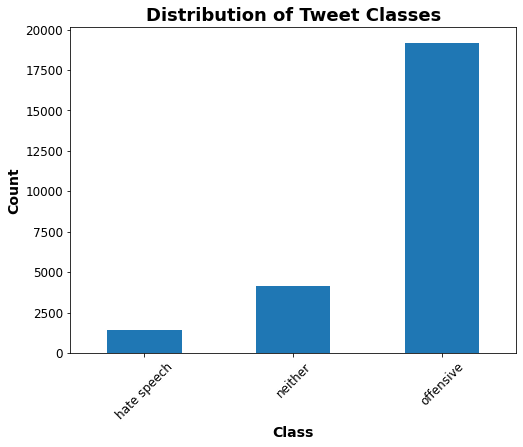

In [9]:
plt.figure(figsize=(8,6))
full_df.groupby('class').tweet.count().plot.bar(ylim=0)
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Tweet Classes', fontsize=18, fontweight='bold')
plt.show()

In [10]:
## Print value counts and percentages of tweets for full dataset
check_unique(full_df, 'tweet') # Each tweet only shows up once

,count,%
"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",1,0.00004
@Princesslexii16 Damn you just called yourself a bitch bruh ? Lol &#9995;,1,0.00004
Lil cuz need to help a bitch out,1,0.00004
@Mimistheone You really seem to love Sandusky. Weirdo. Ur a creepy ass cracker!,1,0.00004
RT @obey_jrock__: This is a true ride or die bitch &#128175; http://t.co/y1t8CTQn4U,1,0.00004
...,...,...
RT @trix2343: @ZitlalyL @Vic_Manzan0 he's a beaner not a nigga,1,0.00004
nope RT @DerekIsNormal: Just ordered Domino's. Am I trash?,1,0.00004
Like that bitch Ernest or somebody,1,0.00004
"RT @OfficiallyIce: Lemme make sure I got this right. As good as the pussy is, I'm supposed to pull OUT when I bust? Nigga please.",1,0.00004


In [11]:
## Create df of all hate speech tweets
hate_df = full_df.groupby('class').get_group('hate speech')
hate_df.head()

,class,tweet,class_code
85,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0
90,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0
111,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0
186,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0
204,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0


In [12]:
## Create df of all offensive tweets
offensive_df = full_df.groupby('class').get_group('offensive')
offensive_df.head()

,class,tweet,class_code
1,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
5,offensive,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",1


In [13]:
## Create df of a subset of offensive tweets (concatenate with other classes to address class imbalance)
offensive_df_subset = offensive_df.sample(4407, random_state=319)
offensive_df_subset.head()

,class,tweet,class_code
22117,offensive,"Them quicc to blast bitches, them all about th...",1
8265,offensive,Bitch and who the fuck r u am speak when the f...,1
20786,offensive,RT @woohdakidd_74: @Shane_A1 &#128514;&#128514...,1
4598,offensive,@RBesofii \nCants even fool a colored man wit ...,1
21540,offensive,Sometimes females are just fucking retarded br...,1


In [14]:
## Create df of neither hate speech nor offensive tweets
neither_df = full_df.groupby('class').get_group('neither')
neither_df.head()

,class,tweet,class_code
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...,2
40,neither,""" momma said no pussy cats inside my doghouse """,2
63,neither,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
66,neither,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
67,neither,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


In [15]:
df = pd.concat([hate_df, offensive_df_subset, neither_df], axis=0)
df.reset_index(inplace=True, drop=True)
display(df.head())
df.info()

,class,tweet,class_code
0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0
1,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0
2,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0
3,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0
4,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       10000 non-null  object
 1   tweet       10000 non-null  object
 2   class_code  10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


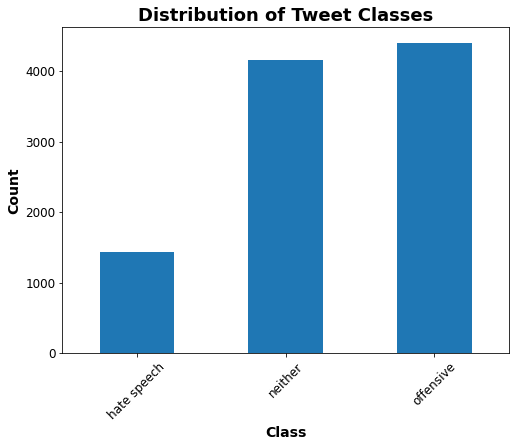

In [16]:
plt.figure(figsize=(8,6))
df.groupby('class').tweet.count().plot.bar(ylim=0)
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Tweet Classes', fontsize=18, fontweight='bold')
plt.show()

# SCRUB

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.collocations import *
from nltk import regexp_tokenize
from sklearn.manifold import TSNE
import string
import re

In [19]:
## Define various parts of stop lists to use for cleaning tokenized tweets
# List of misspellings and shorthands that are equivalent to nltk's english stopwords
twitter_stops = ['bc', "i'm", 'im', "i'll", "i've" "it'll", 'hav',
                 "that's", 'dat', 'dats', 'u', 'da', 'n', "there's",
                 "he's", 'hes', "we'll", "we've", 'cus']

# Punctuation tokens to remove in addition to string.punctuation
more_punc = ['...', '“','”',"''",'’','``','. .', '..']

# List of numbers to remove
num = [0,1,2,3,4,5,6,7,8,9]

# Full list of all stop tokens (words and punctuation)
stopwords_list = stopwords.words('english') + list(string.punctuation) + twitter_stops + more_punc + num

# List of punctuation stop tokens
stoppunct_list = list(string.punctuation) + more_punc

In [20]:
"had" in stopwords.words('english')

True

In [21]:
"i" in stopwords_list

True

In [100]:
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize()

In [105]:
def lemma_text(token_list):
    
    from nltk.stem import WordNetLemmatizer 

    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in token_list])
    
    return lemmatized_output

In [138]:
## Create new cols in df for tweets cleaned (and tokenized) to differing degrees
# Text cleaned of mentions, url's, etc.
df['text'] = df['tweet'].apply(lambda x: clean_tweet(x))
# Punctuation removed
df['tokens_clean'] = df['tweet'].apply(lambda x: tokenize_tweet(x, stoppunct_list))
# Stop words and punctuation removed
df['tokens_stopped'] = df['tweet'].apply(lambda x: tokenize_tweet(x, stopwords_list))
# Cleaned text lemmatized
df['lemma_text'] = df['tokens_stopped'].apply(lambda x: lemma_text(x))
# Lemmatized tokens
df['lemma_tokens'] = df['lemma_text'].apply(lambda x: tokenize_tweet(x, stopwords_list))
# Preview updated df
df.head()

,class,tweet,class_code,text,tokens_clean,tokens_stopped,lemma_text,lemma_tokens
0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0,""" : queer"" gaywad","[queer, gaywad]","[queer, gaywad]",queer gaywad,"[queer, gaywad]"
1,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0,""" : alsarabsss"" hes a beaner smh you can tel...","[alsarabsss, hes, a, beaner, smh, you, can, te...","[alsarabsss, beaner, smh, tell, mexican]",alsarabsss beaner smh tell mexican,"[alsarabsss, beaner, smh, tell, mexican]"
2,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0,""" : you're fucking gay, blacklisted hoe"" Hol...","[you're, fucking, gay, blacklisted, hoe, holdi...","[fucking, gay, blacklisted, hoe, holding, tehg...",fucking gay blacklisted hoe holding tehgodclan...,"[fucking, gay, blacklisted, hoe, holding, tehg..."
3,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0,""" : LMFAOOOO I HATE BLACK PEOPLE This is why...","[lmfaoooo, i, hate, black, people, this, is, w...","[lmfaoooo, hate, black, people, black, people,...",lmfaoooo hate black people black people nigger,"[lmfaoooo, hate, black, people, black, people,..."
4,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0,""" : ""At least I'm not a nigger"" \n\nLmfao","[at, least, i'm, not, a, nigger, lmfao]","[least, nigger, lmfao]",least nigger lmfao,"[least, nigger, lmfao]"


# EXPLORE

In [23]:
from nltk import FreqDist
from wordcloud import WordCloud

In [24]:
## Create a variable "raw_corpus" containing all text
raw_corpus = df['text'].to_list()
raw_corpus[:20]

['" :     queer" gaywad',
 '" :   alsarabsss" hes a beaner smh you can tell hes a mexican',
 '" :   you\'re fucking gay, blacklisted hoe" Holding out for  TehGodClan anyway  ',
 '" : LMFAOOOO I HATE BLACK PEOPLE   This is why there\'s black people and niggers',
 '" : "At least I\'m not a nigger"  \n\nLmfao',
 '" :   Ariza is a snake and a coward" but at least he isn\'t a cripple like your hero Roach lmaoo',
 '" : Drakes new shoes that will be released by Nike/Jordan.... Yes, there\'s glitter on the shoes   ....dudes a fag',
 '" :  GerrysHalloweenParty   Halloween was yesterday stupid nigger',
 '" :   is bored supposed to be cute, you faggot?" Sometimes',
 '" :   lassen cc , the coach wants me" i feel it youll get more my nig no doubt',
 '" : Jackies a retard  blondeproblems" At least I can make a grilled cheese!',
 '" : Stacey Dash won  ;   baddest bitch evaaaa',
 '"Don\'t worry about the nigga you see, worry about the nigga you DON\'T see... Dat\'s da nigga fuckin yo bitch."',
 '"Hey 

In [25]:
clean_tokens = get_token_list(df, 'tokens_clean', freq=True)


********** tokens_clean Summary **********

Number of unique words = 14200


,token,count
0,a,3717
1,the,3380
2,i,2867
3,to,2277
4,you,2173
5,and,2166
6,bitch,2064
7,in,1416
8,is,1349
9,that,1313


In [26]:
stopped_tokens = get_token_list(df, 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 14021


,token,count
0,bitch,2064
1,like,981
2,trash,897
3,bitches,764
4,hoes,584
5,pussy,564
6,hoe,518
7,get,487
8,ass,458
9,fuck,413


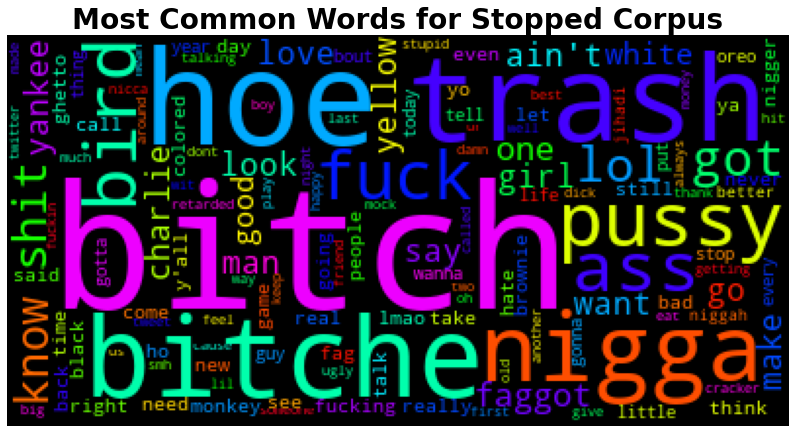

In [27]:
plot_wordcloud(stopped_tokens, 'Stopped Corpus');

In [28]:
hate_tokens = get_token_list(df.groupby('class').get_group('hate speech'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 3487


,token,count
0,bitch,209
1,faggot,190
2,like,167
3,nigga,139
4,ass,138
5,white,127
6,fuck,121
7,trash,113
8,nigger,112
9,fucking,94


In [29]:
offensive_tokens = get_token_list(df.groupby('class').get_group('offensive'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 6685


,token,count
0,bitch,1844
1,bitches,705
2,hoes,518
3,like,512
4,pussy,508
5,hoe,440
6,ass,317
7,fuck,292
8,shit,283
9,get,271


In [30]:
neither_tokens = get_token_list(df.groupby('class').get_group('neither'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 9652


,token,count
0,trash,689
1,bird,303
2,like,302
3,charlie,260
4,yankees,225
5,yellow,218
6,birds,169
7,lol,147
8,get,147
9,one,130


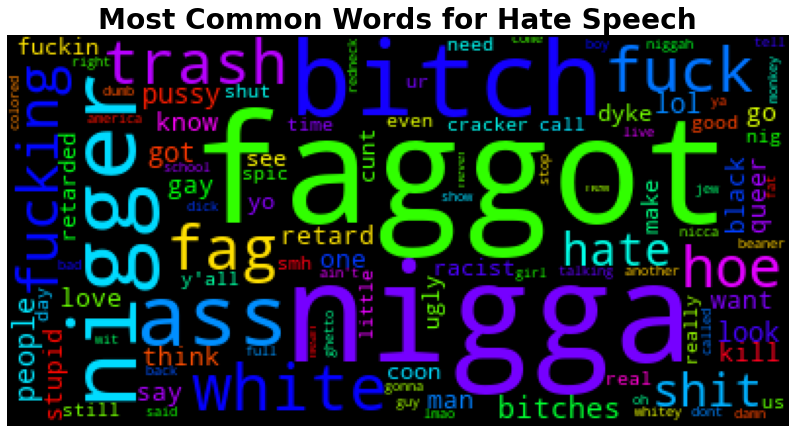

In [31]:
plot_wordcloud(hate_tokens, 'Hate Speech');

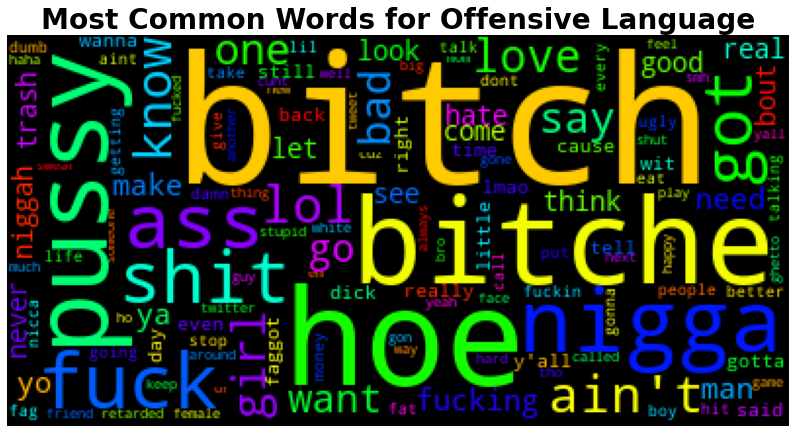

In [32]:
plot_wordcloud(offensive_tokens, 'Offensive Language');

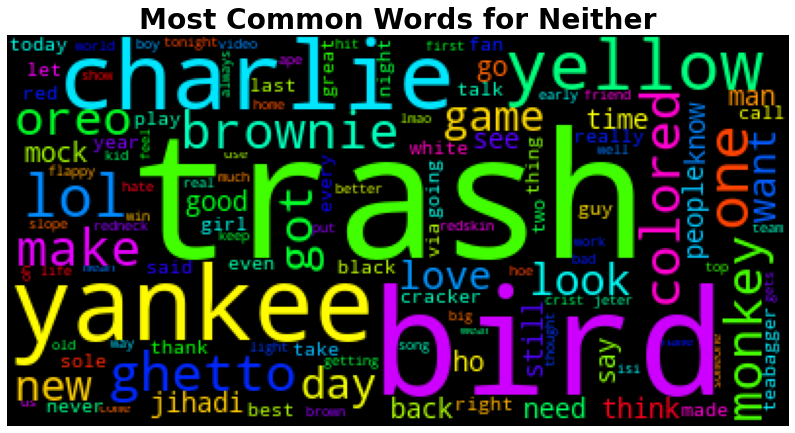

In [33]:
plot_wordcloud(neither_tokens, 'Neither');

In [34]:
## Create bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

## Make a DataFrame from the bigrams
pd.DataFrame(tweets_scored, columns=['Word', 'Freq']).head(25)

,Word,Freq
0,"(look, like)",0.001046
1,"(white, trash)",0.000980
2,"(bitch, ass)",0.000913
3,"(like, bitch)",0.000715
4,"(ass, nigga)",0.000702
5,"(ass, bitch)",0.000688
6,"(bad, bitch)",0.000649
7,"(fuck, bitch)",0.000635
8,"(flappy, bird)",0.000556
9,"(little, bitch)",0.000530


In [35]:
## Calculate Pointwise Mutual Information scores
tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)
tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

# Make a DataFrame from the Bigrams with PMI
pd.DataFrame.from_records(tweet_pmi_scored, columns=['Words', 'PMI']).head(25)

,Words,PMI
0,"(spear, chucker)",13.619972
1,"(disrupts, shylock)",13.397579
2,"(operation, disrupts)",13.397579
3,"(shylock, banking)",13.397579
4,"(scally, lad)",12.549582
5,"(blah, blah)",12.368433
6,"(rated, spa)",11.957007
7,"(grand, opening)",11.812617
8,"(guinea, pig)",11.812617
9,"(catches, worm)",11.771975


# MODEL

## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn import metrics

In [124]:
## Make X and y
y = df['class_code'].copy()
X = df['text'].copy()
X_lemma = df['lemma_text'].copy()

In [125]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=319)
# setting stratify=y should ensure class imbalances remain similar to original distribution

In [126]:
## Check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 1    0.4407
2    0.4163
0    0.1430
Name: class_code, dtype: float64 
------

**y_train**
 1    0.44075
2    0.41625
0    0.14300
Name: class_code, dtype: float64 
------

**y_test**
 1    0.4405
2    0.4165
0    0.1430
Name: class_code, dtype: float64 
------



In [127]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000,) (2000,) (8000,) (2000,)


In [128]:
## Train Test Split
X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(X_lemma,
                                                                            y,
                                                                            test_size=0.2,
                                                                            stratify=y,
                                                                            random_state=319)
# setting stratify=y should ensure class imbalances remain similar to original distribution

In [122]:
X_train

7332    Damn those shiner rock those bud light platinu...
9652    Video: Charlie Baker makes final push for votes  
1746                                               bitch.
6696      hey I'll leave Abbey too! Oh if I get a job ...
7487              Gone bust it open for a real nicca  ; ;
                              ...                        
586                                      stfu u ugly dyke
64                ; : "fucking white people"   bitch wut?
9729    Whoever made these brownies and cookies belong...
9964    they're not playing Charlie Strong's soft don'...
4312                   You pussy nigga, I see ya whiskers
Name: text, Length: 8000, dtype: object

In [129]:
X_lemma_train

7332            damn shiner rock bud light platinum ciroc
9652             video charlie baker make final push vote
1746                                                bitch
6696    hey leave abbey oh get job slope might move ba...
7487                            gone bust open real nicca
                              ...                        
586                                        stfu ugly dyke
64                         fucking white people bitch wut
9729            whoever made brownie cooky belongs heaven
9964    they're playing charlie strong's soft run scor...
4312                           pussy nigga see ya whisker
Name: lemma_text, Length: 8000, dtype: object

## Baseline Models

In [41]:
## Initialize tokenizer to use for base model
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

## Initialize vectorizers to use for base models
count_vec = CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)

tfidf_vec = TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)

## Vectorize X_train and X_test with each vectorizer
X_train_count_vec = count_vec.fit_transform(X_train)
X_test_count_vec = count_vec.transform(X_test)

X_train_tfidf_vec = tfidf_vec.fit_transform(X_train)
X_test_tfidf_vec = tfidf_vec.transform(X_test)

print(X_train_count_vec.shape, X_test_count_vec.shape)
print(X_train_tfidf_vec.shape, X_test_tfidf_vec.shape)

(8000, 12432) (2000, 12432)
(8000, 12432) (2000, 12432)


### Baseline Random Forest Classifiers

In [42]:
## Build baseline Random Forest Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
rf_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('rf', RandomForestClassifier(random_state=319))
                        ])

rf_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('rf', RandomForestClassifier(random_state=319))
                        ])

---------------------------------------------------------
Classification Report: Baseline RF with Count Vectorizer
---------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.69      0.53      0.60       286
   Offensive       0.85      0.90      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.86      0.86      0.86      2000

---------------------------------------------------------
---------------------------------------------------------




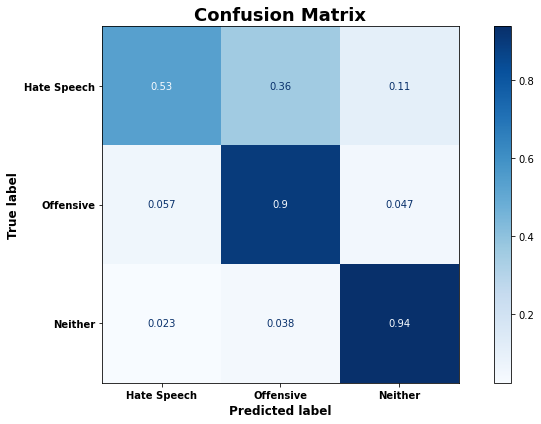

In [43]:
## Fit and evaluate baseline RF with Count Vectorizer
rf_cv_pipe.fit(X_train, y_train)
eval_classifier(rf_cv_pipe, X_test, y_test, model_descr='Baseline RF with Count Vectorizer');

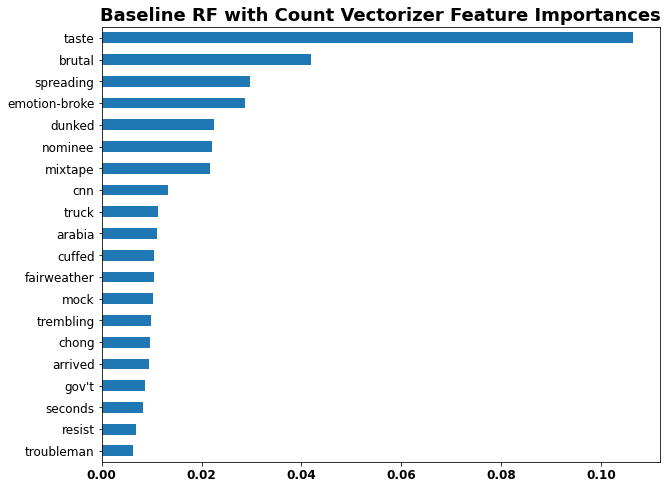

In [44]:
plot_feat_importance(rf_cv_pipe, 'rf', 'count_vec', 'Baseline RF with Count Vectorizer');

----------------------------------------------------------
Classification Report: Baseline RF with TF-IDF Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.77      0.49      0.60       286
   Offensive       0.85      0.91      0.88       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.78      0.80      2000
weighted avg       0.86      0.87      0.86      2000

----------------------------------------------------------
----------------------------------------------------------




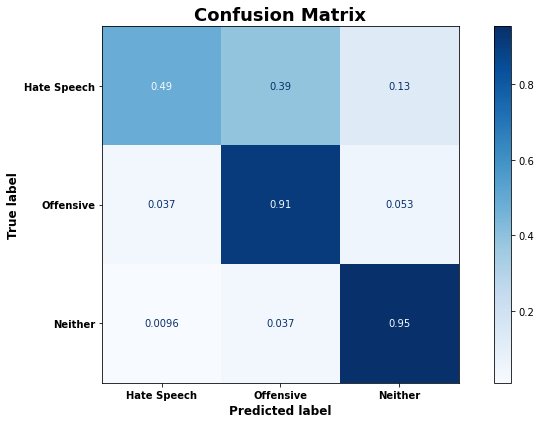

In [45]:
## Fit and evaluate baseline RF with TF-IDF Vectorizer
rf_tfidf_pipe.fit(X_train, y_train)
eval_classifier(rf_tfidf_pipe, X_test, y_test, model_descr='Baseline RF with TF-IDF Vectorizer');

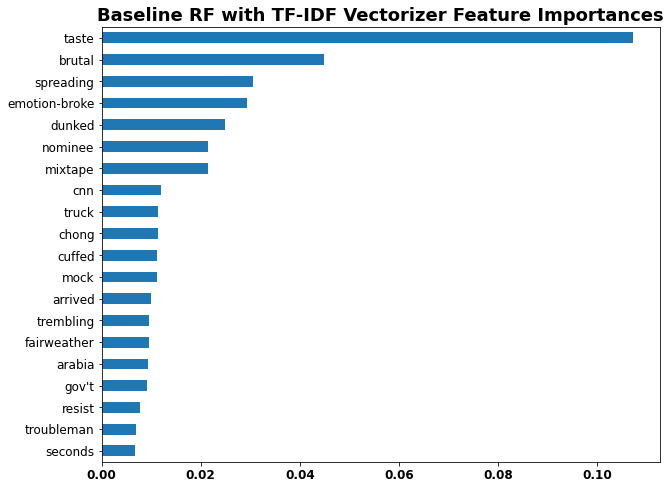

In [46]:
plot_feat_importance(rf_tfidf_pipe, 'rf', 'tfidf_vec', 'Baseline RF with TF-IDF Vectorizer');

### Baseline Multinomial Naive Bayes Classifiers

In [47]:
# Build baseline Multinomial Naive Bayes Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
mnb_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('mnb', MultinomialNB())
                        ])

mnb_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('mnb', MultinomialNB())
                        ])

----------------------------------------------------------
Classification Report: Baseline MNB with Count Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.31      0.44       286
   Offensive       0.78      0.95      0.85       881
     Neither       0.91      0.88      0.89       833

    accuracy                           0.83      2000
   macro avg       0.81      0.71      0.73      2000
weighted avg       0.83      0.83      0.81      2000

----------------------------------------------------------
----------------------------------------------------------




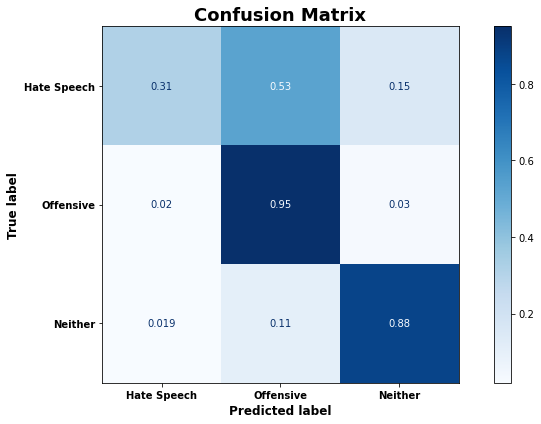

In [48]:
## Fit and evaluate baseline MNB with Count Vectorizer
mnb_cv_pipe.fit(X_train, y_train)
eval_classifier(mnb_cv_pipe, X_test, y_test, model_descr='Baseline MNB with Count Vectorizer');

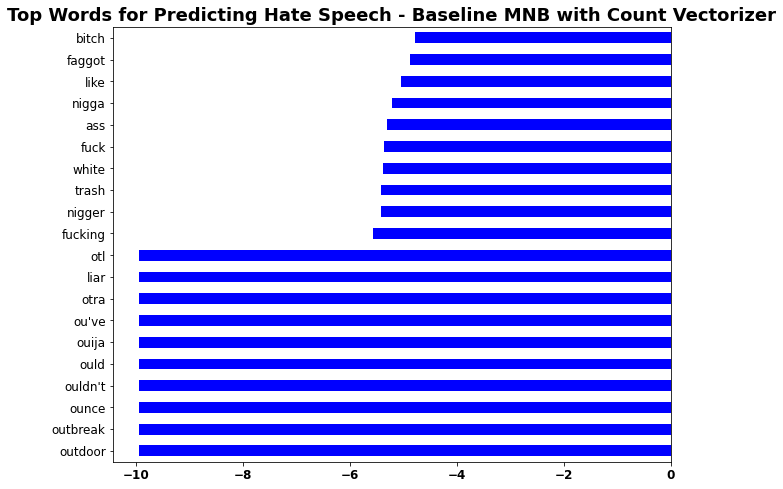

In [49]:
plot_coefficients(mnb_cv_pipe, 'mnb', 'count_vec', 0, 'Baseline MNB with Count Vectorizer');

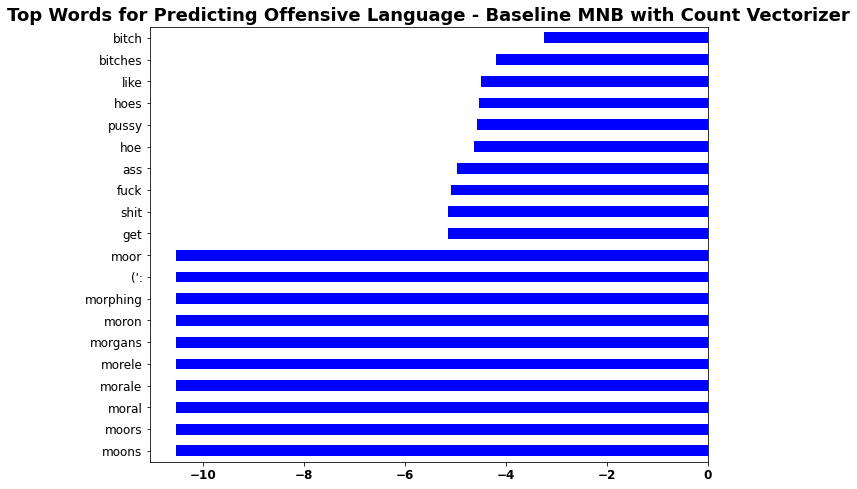

In [50]:
plot_coefficients(mnb_cv_pipe, 'mnb', 'count_vec', 1, 'Baseline MNB with Count Vectorizer');

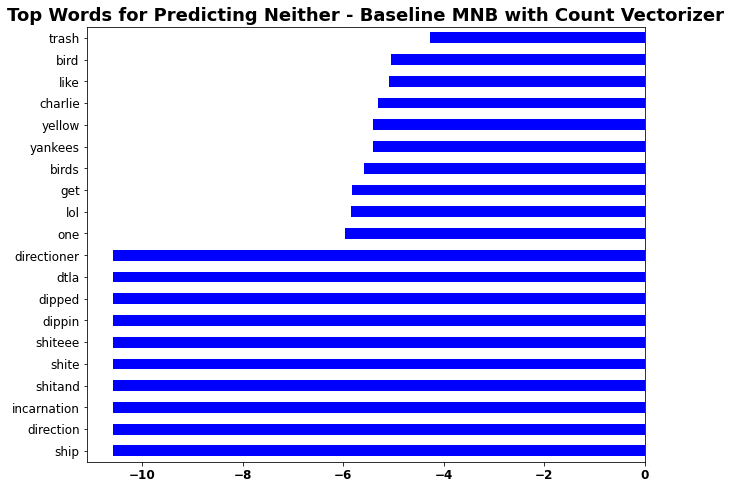

In [51]:
plot_coefficients(mnb_cv_pipe, 'mnb', 'count_vec', 2, 'Baseline MNB with Count Vectorizer');

-----------------------------------------------------------
Classification Report: Baseline MNB with TF-IDF Vectorizer
-----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.89      0.06      0.11       286
   Offensive       0.70      0.97      0.81       881
     Neither       0.90      0.83      0.86       833

    accuracy                           0.78      2000
   macro avg       0.83      0.62      0.59      2000
weighted avg       0.81      0.78      0.73      2000

-----------------------------------------------------------
-----------------------------------------------------------




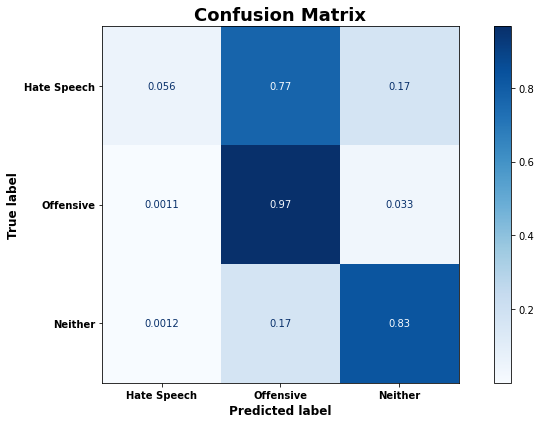

In [52]:
## Fit and evaluate baseline MNB with Count Vectorizer
mnb_tfidf_pipe.fit(X_train, y_train)
eval_classifier(mnb_tfidf_pipe, X_test, y_test, model_descr='Baseline MNB with TF-IDF Vectorizer');

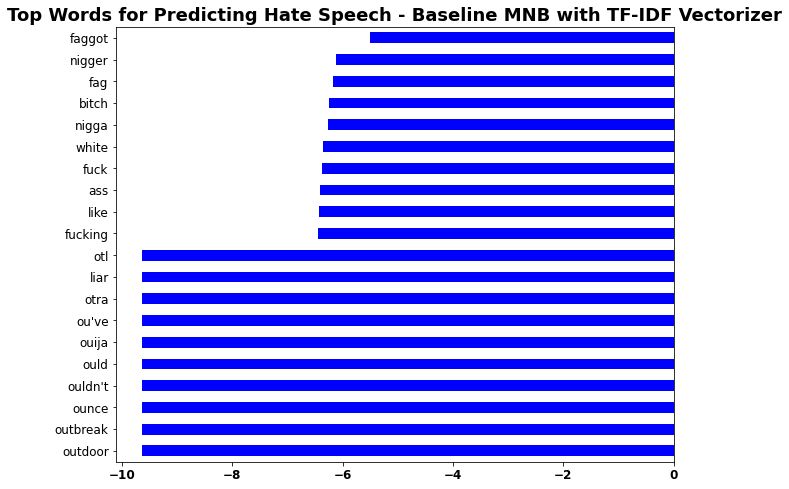

In [53]:
plot_coefficients(mnb_tfidf_pipe, 'mnb', 'tfidf_vec', 0, 'Baseline MNB with TF-IDF Vectorizer');

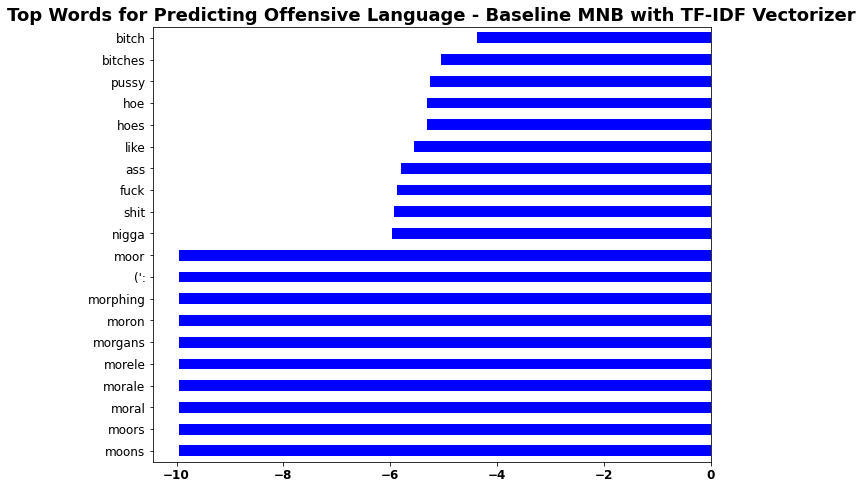

In [54]:
plot_coefficients(mnb_tfidf_pipe, 'mnb', 'tfidf_vec', 1, 'Baseline MNB with TF-IDF Vectorizer');

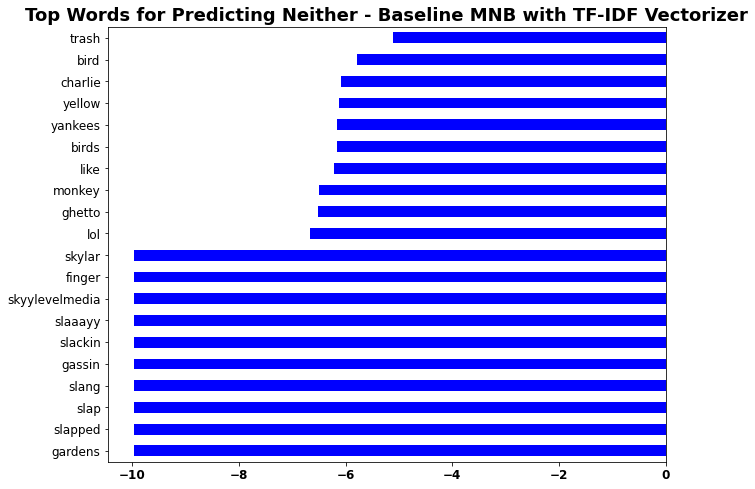

In [55]:
plot_coefficients(mnb_tfidf_pipe, 'mnb', 'tfidf_vec', 2, 'Baseline MNB with TF-IDF Vectorizer');

### Baseline LinearSVC Classifiers

In [56]:
# Build baseline LinearSVC Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
svc_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svc', LinearSVC(random_state=319))
                        ])

svc_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svc', LinearSVC(random_state=319))
                        ])

----------------------------------------------------------------
Classification Report: Baseline LinearSVC with Count Vectorizer
----------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.60      0.57      0.59       286
   Offensive       0.84      0.87      0.85       881
     Neither       0.92      0.91      0.91       833

    accuracy                           0.84      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.84      0.84      0.84      2000

----------------------------------------------------------------
----------------------------------------------------------------




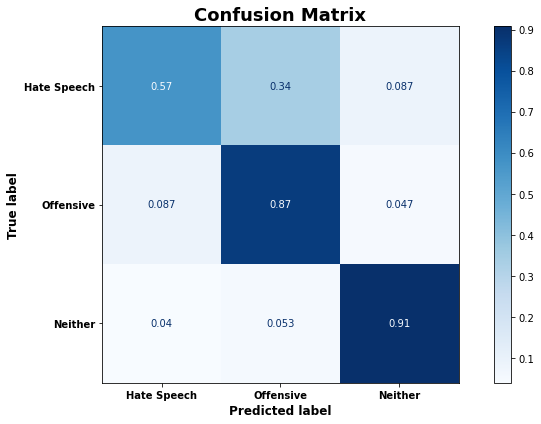

In [57]:
## Fit and evaluate baseline LinearSVC with Count Vectorizer
svc_cv_pipe.fit(X_train, y_train)
eval_classifier(svc_cv_pipe, X_test, y_test, model_descr='Baseline LinearSVC with Count Vectorizer');

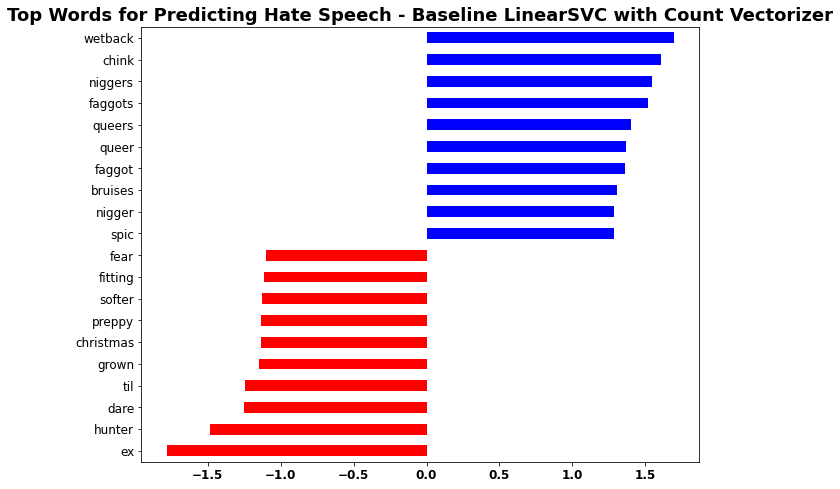

In [58]:
plot_coefficients(svc_cv_pipe, 'svc', 'count_vec', 0, 'Baseline LinearSVC with Count Vectorizer');

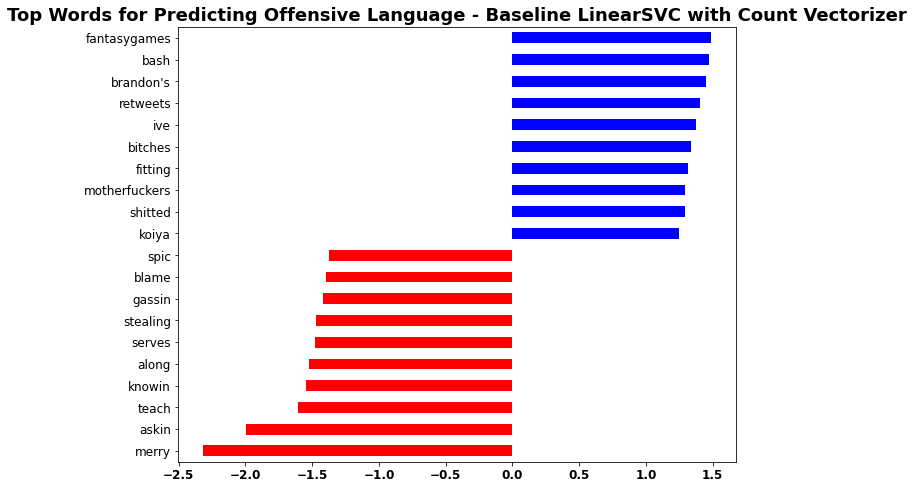

In [59]:
plot_coefficients(svc_cv_pipe, 'svc', 'count_vec', 1, 'Baseline LinearSVC with Count Vectorizer');

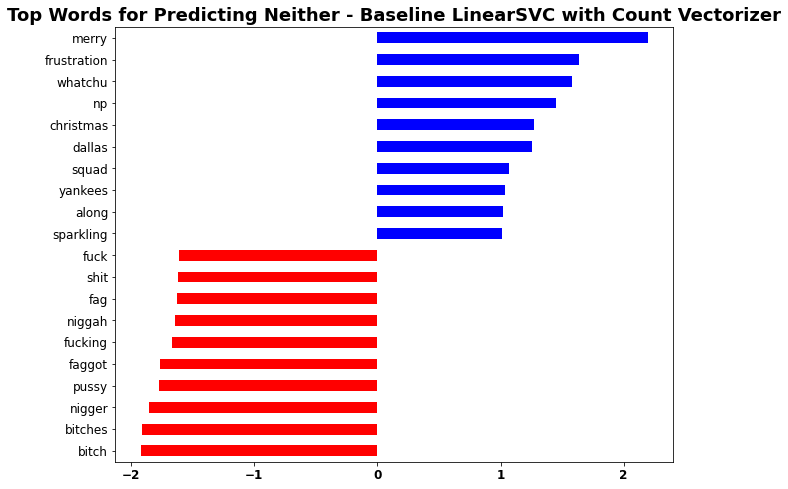

In [60]:
plot_coefficients(svc_cv_pipe, 'svc', 'count_vec', 2, 'Baseline LinearSVC with Count Vectorizer');

-----------------------------------------------------------------
Classification Report: Baseline LinearSVC with TF-IDF Vectorizer
-----------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.70      0.55      0.61       286
   Offensive       0.86      0.89      0.87       881
     Neither       0.90      0.94      0.92       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.85      0.86      0.85      2000

-----------------------------------------------------------------
-----------------------------------------------------------------




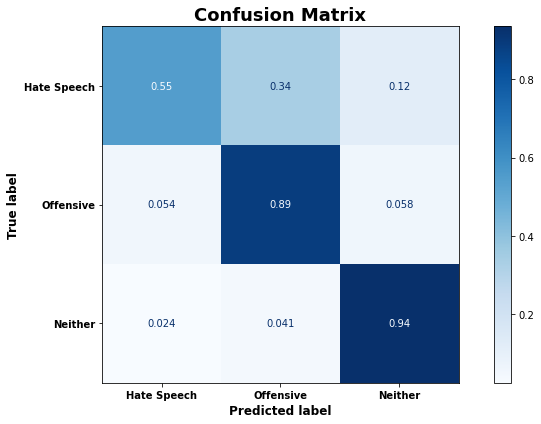

In [61]:
## Fit and evaluate baseline LinearSVC with Count Vectorizer
svc_tfidf_pipe.fit(X_train, y_train)
eval_classifier(svc_tfidf_pipe, X_test, y_test, model_descr='Baseline LinearSVC with TF-IDF Vectorizer');

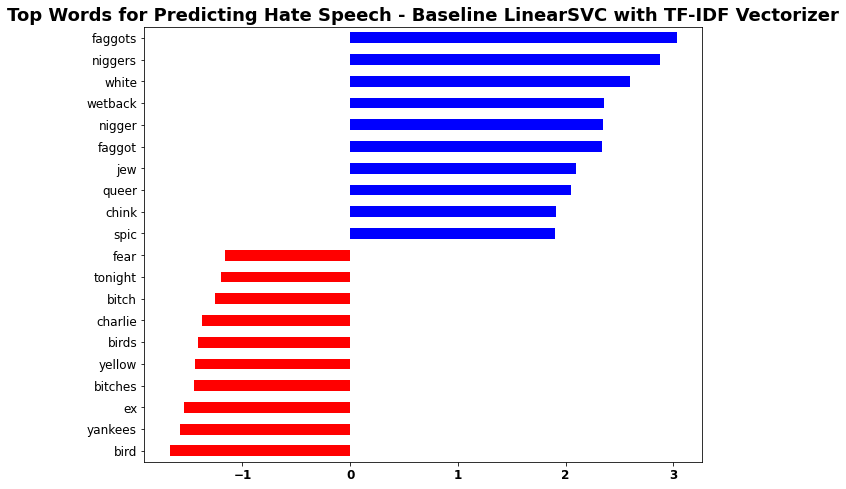

In [62]:
plot_coefficients(svc_tfidf_pipe, 'svc', 'tfidf_vec', 0, 'Baseline LinearSVC with TF-IDF Vectorizer');

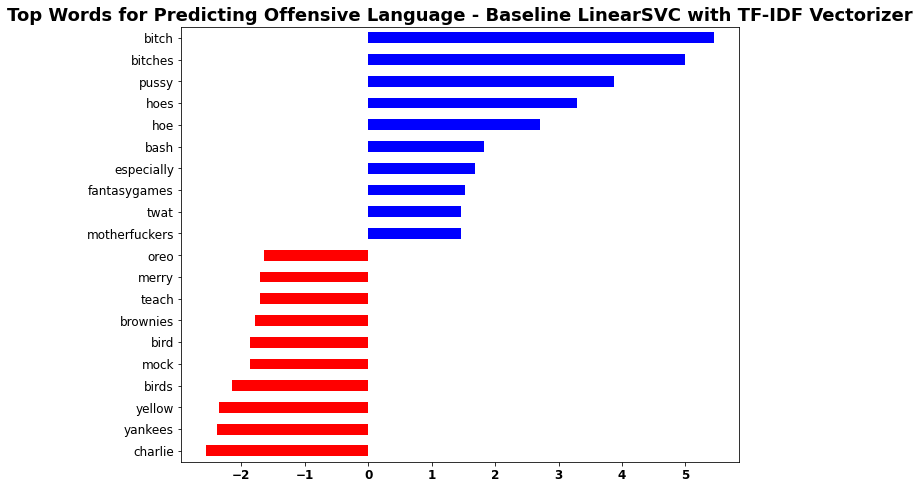

In [63]:
plot_coefficients(svc_tfidf_pipe, 'svc', 'tfidf_vec', 1, 'Baseline LinearSVC with TF-IDF Vectorizer');

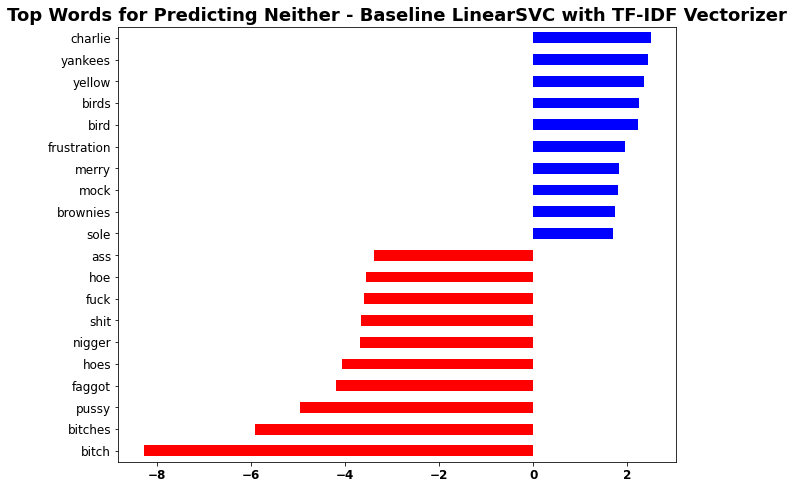

In [64]:
plot_coefficients(svc_tfidf_pipe, 'svc', 'tfidf_vec', 2, 'Baseline LinearSVC with TF-IDF Vectorizer');

### Baseline XGB Classifiers

In [65]:
## Build baseline XGBoost Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
xgb_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svd', TruncatedSVD(n_components=150, random_state=319)),
                         ('xgb', XGBClassifier(random_state=319, n_jobs=-1))
                        ])

xgb_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svd', TruncatedSVD(n_components=150, random_state=319)),
                         ('xgb', XGBClassifier(random_state=319, n_jobs=-1))
                        ])

----------------------------------------------------------
Classification Report: Baseline XGB with Count Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.36      0.48       286
   Offensive       0.87      0.86      0.87       881
     Neither       0.82      0.97      0.89       833

    accuracy                           0.83      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.83      0.83      0.82      2000

----------------------------------------------------------
----------------------------------------------------------




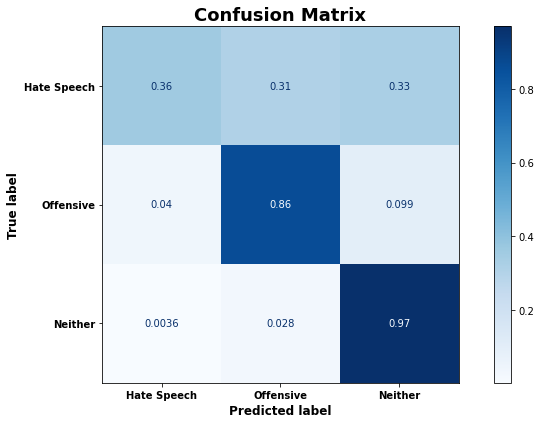

In [66]:
## Fit and evaluate baseline XGB with Count Vectorizer
xgb_cv_pipe.fit(X_train, y_train)
eval_classifier(xgb_cv_pipe, X_test, y_test, model_descr='Baseline XGB with Count Vectorizer');

In [67]:
#plot_feat_importance(xgb_cv_pipe, 'xgb', 'count_vec', 'Baseline XGB with Count Vectorizer');

-----------------------------------------------------------
Classification Report: Baseline XGB with TF-IDF Vectorizer
-----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.71      0.42      0.53       286
   Offensive       0.87      0.88      0.87       881
     Neither       0.85      0.96      0.90       833

    accuracy                           0.84      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.84      0.84      0.83      2000

-----------------------------------------------------------
-----------------------------------------------------------




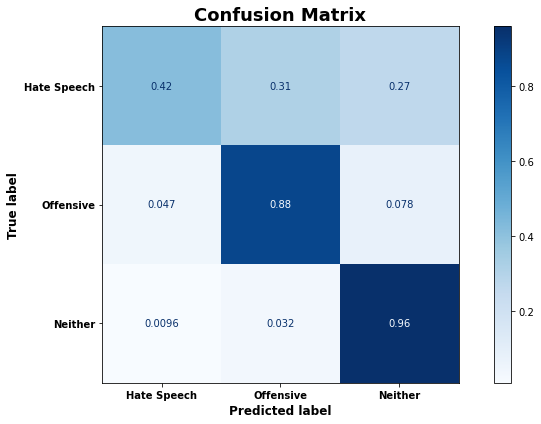

In [68]:
## Fit and evaluate baseline XGB with TF-IDF Vectorizer
xgb_tfidf_pipe.fit(X_train, y_train)
eval_classifier(xgb_tfidf_pipe, X_test, y_test, model_descr='Baseline XGB with TF-IDF Vectorizer');

## Hyperparameter Tuning for Random Forest Classifiers

### Tuning Count Vectorizer Random Forests

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:49:43 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:50:38 PM

***** Total Training Time: 0:00:54.755132


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 2), 'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None}


-------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Accuracy
-------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.57      0.62       286
   Offensive       0.87      0.89      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.87      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.86      0.87      0.

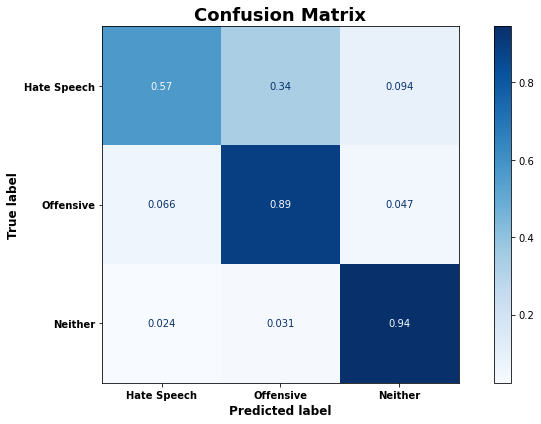

In [69]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_acc_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Accuracy',
                       score='accuracy')

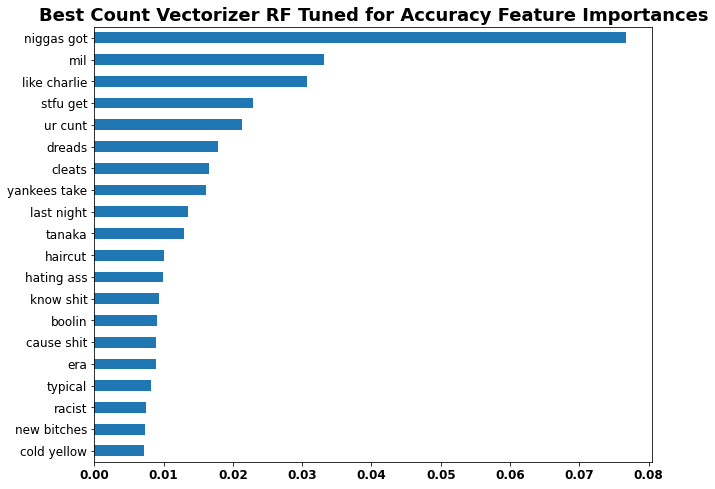

In [71]:
plot_feat_importance(rf_cv_acc_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:50:39 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:51:27 PM

***** Total Training Time: 0:00:48.318463


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 2), 'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None}


----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Balanced Accuracy
----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.57      0.62       286
   Offensive       0.87      0.89      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.87      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg  

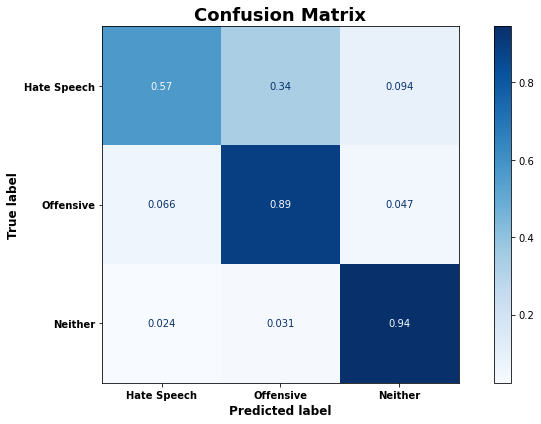

In [72]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_bacc_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

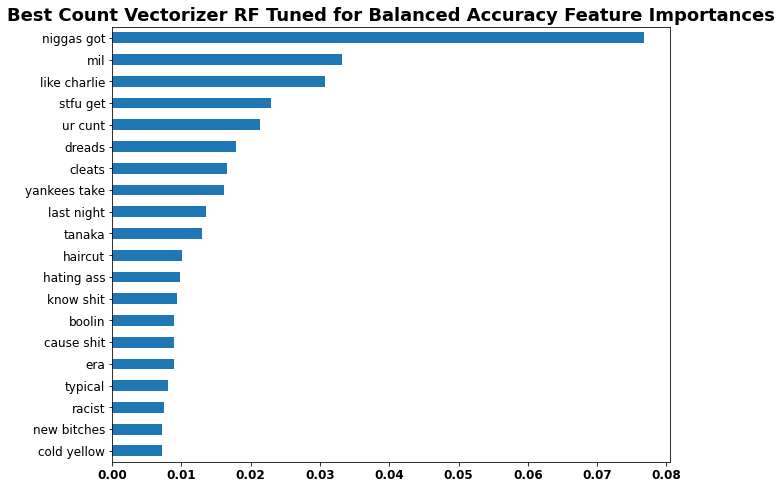

In [73]:
plot_feat_importance(rf_cv_bacc_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Balanced Accuracy');

### Tuning TF-IDF Vectorizer Random Forests

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:51:28 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:52:14 PM

***** Total Training Time: 0:00:45.790947


Best Parameters:
{'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': None, 'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2)}


---------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Accuracy
---------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.76      0.49      0.60       286
   Offensive       0.86      0.91      0.88       881
     Neither       0.90      0.96      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.79      0.80      2000
weighted avg       0.86      0.87      0.86      2000

-------------

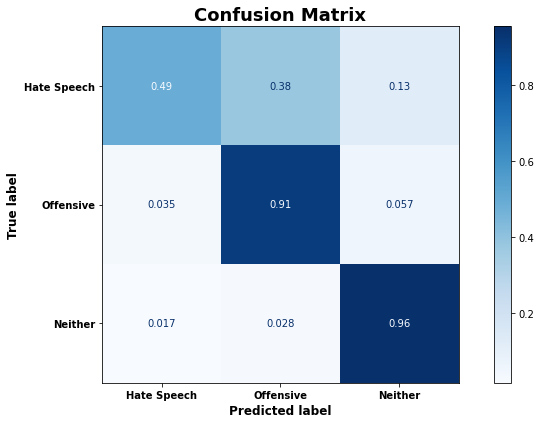

In [74]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_acc_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Accuracy',
                       score='accuracy')

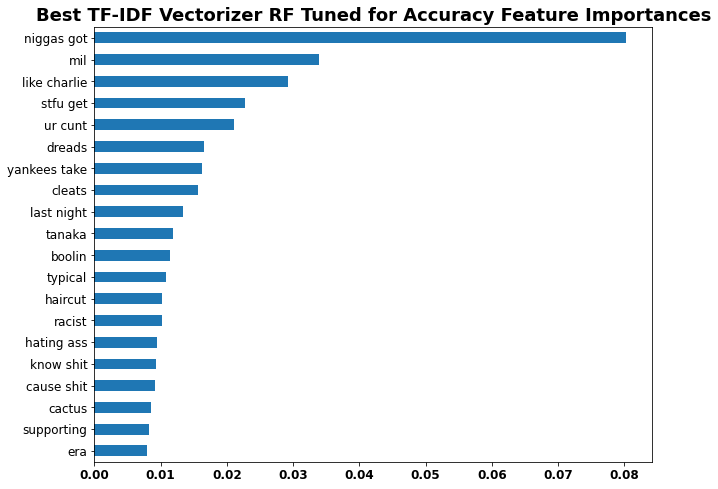

In [75]:
plot_feat_importance(rf_tfidf_acc_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:52:15 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:52:59 PM

***** Total Training Time: 0:00:43.917343


Best Parameters:
{'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None, 'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2)}


------------------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Balanced Accuracy
------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.50      0.60       286
   Offensive       0.86      0.90      0.88       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.87      2000
   macro avg       0.83      0.79      0.80      2000
weighted avg       0.86      0.87      0.86 

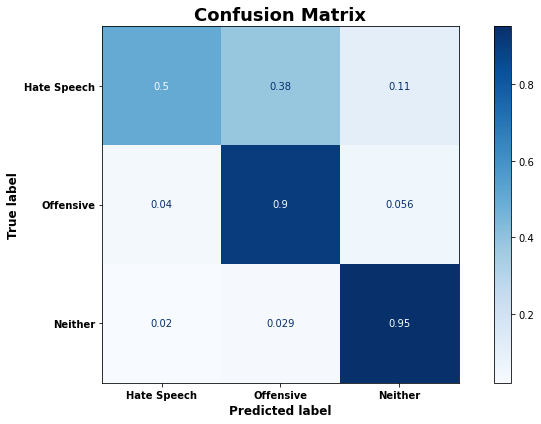

In [76]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_bacc_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

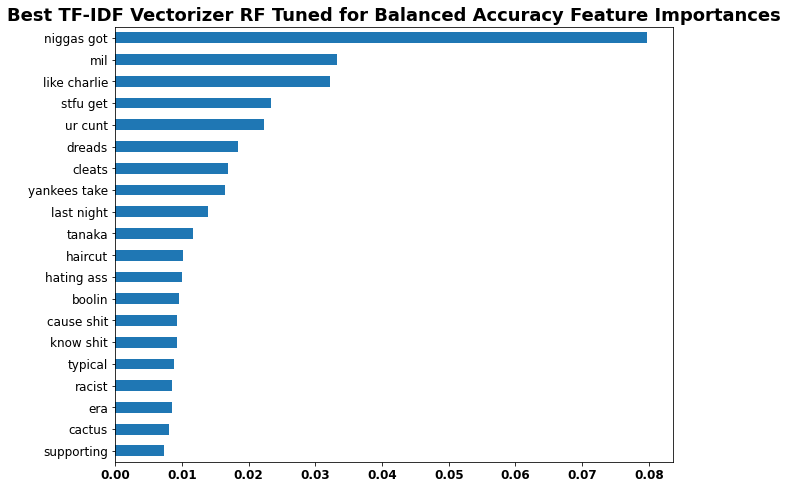

In [77]:
plot_feat_importance(rf_tfidf_bacc_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Balanced Accuracy');

## Hyperparameter Tuning for Multinomial Naive Bayes Classifiers

### Tuning Count Vectorizer MNB Models

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:53:00 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:53:14 PM

***** Total Training Time: 0:00:13.650894


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 3), 'mnb__alpha': 1.0}


--------------------------------------------------------------------
Classification Report: Best Count Vectorizer MNB Tuned for Accuracy
--------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.44      0.53       286
   Offensive       0.80      0.92      0.86       881
     Neither       0.92      0.89      0.91       833

    accuracy                           0.84      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000

--------------------------------------------

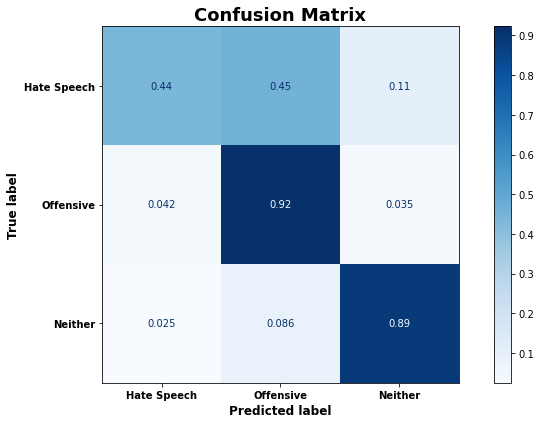

In [78]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_cv_acc_grid = fit_grid_clf(mnb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer MNB Tuned for Accuracy',
                       score='accuracy')

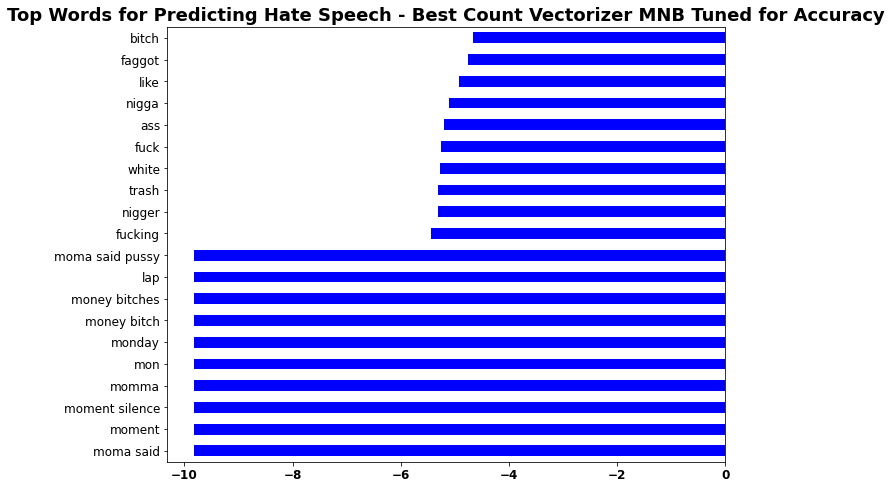

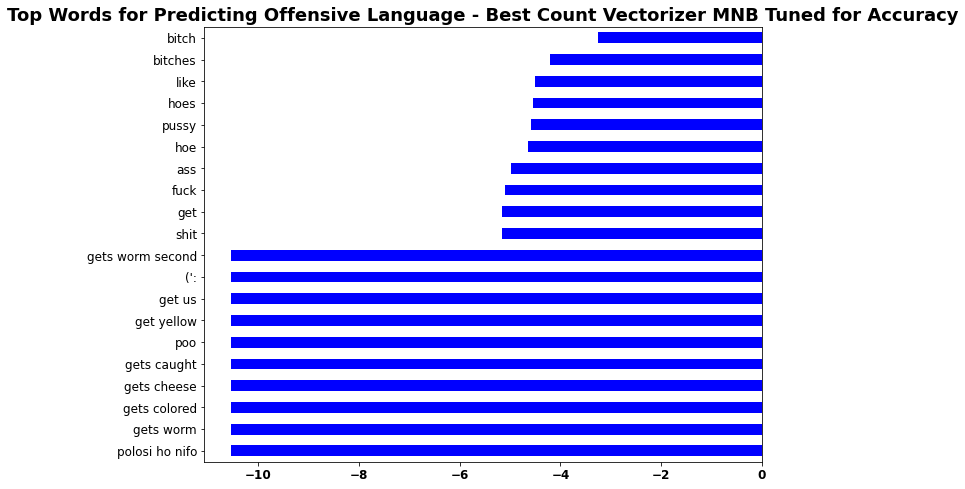

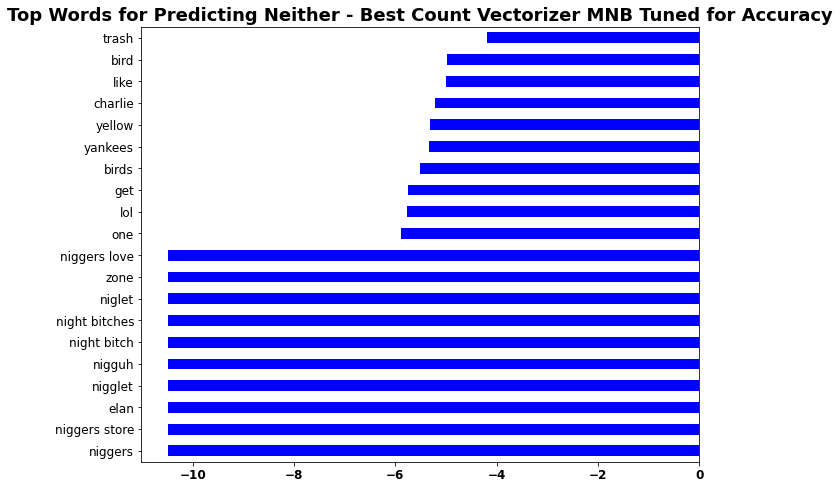

In [79]:
for i in range(0,3):
    plot_coefficients(mnb_cv_acc_grid.best_estimator_, 'mnb', 'count_vec', i,
                      'Best Count Vectorizer MNB Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:53:15 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:53:28 PM

***** Total Training Time: 0:00:13.373295


Best Parameters:
{'count_vec__min_df': 3, 'count_vec__ngram_range': (1, 3), 'mnb__alpha': 1.0}


-----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer MNB Tuned for Balanced Accuracy
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.64      0.47      0.54       286
   Offensive       0.80      0.91      0.85       881
     Neither       0.93      0.88      0.91       833

    accuracy                           0.84      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000

-----------------

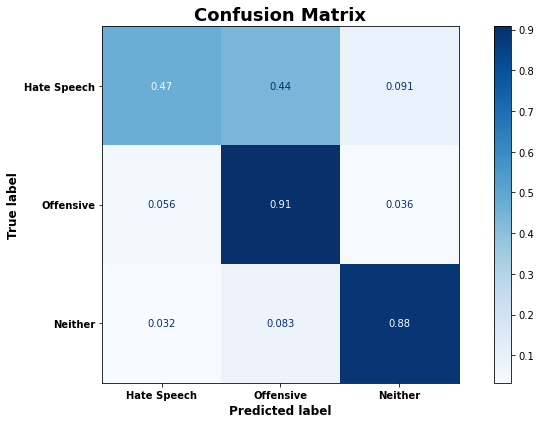

In [80]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_cv_bacc_grid = fit_grid_clf(mnb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer MNB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

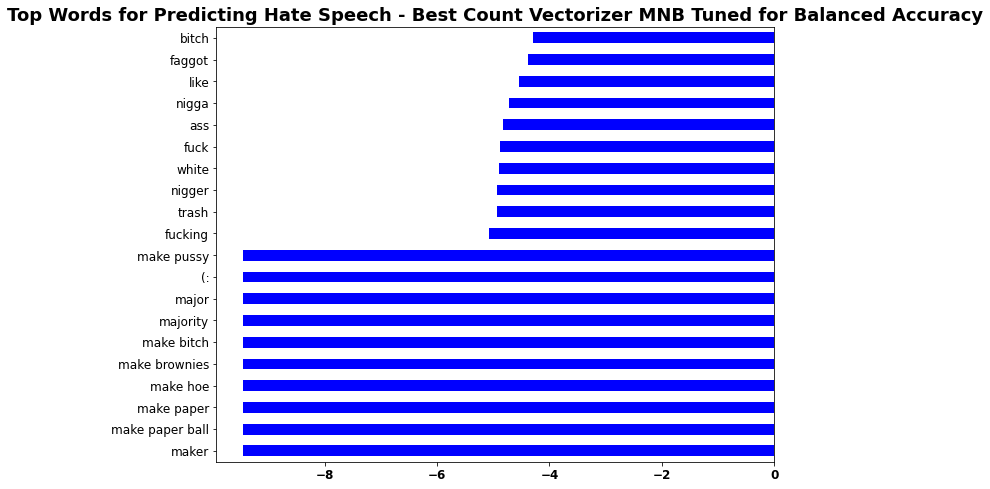

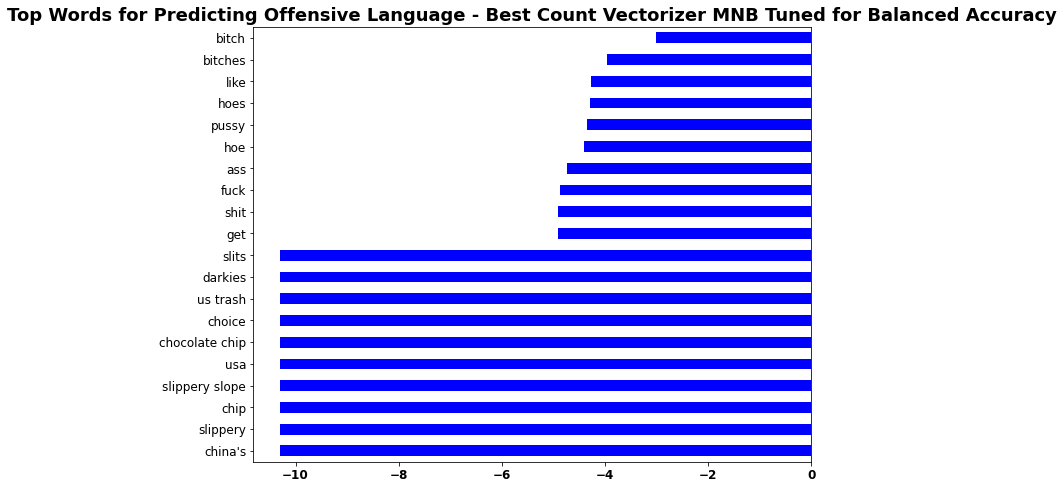

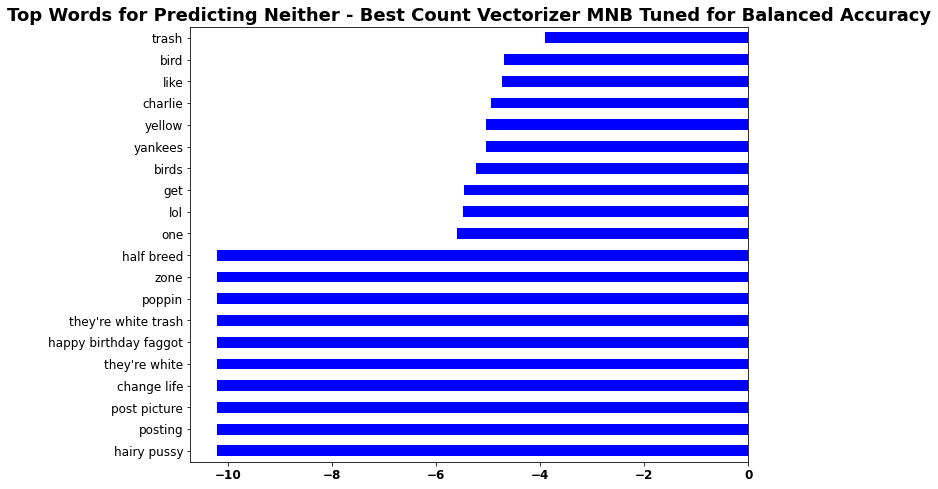

In [81]:
for i in range(0,3):
    plot_coefficients(mnb_cv_bacc_grid.best_estimator_, 'mnb', 'count_vec', i,
                      'Best Count Vectorizer MNB Tuned for Balanced Accuracy')

### Tuning TF-IDF MNB Models

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:53:30 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:53:42 PM

***** Total Training Time: 0:00:12.125230


Best Parameters:
{'mnb__alpha': 1.0, 'tfidf_vec__min_df': 3, 'tfidf_vec__ngram_range': (1, 2)}


---------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer MNB Tuned for Accuracy
---------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.83      0.21      0.33       286
   Offensive       0.75      0.95      0.84       881
     Neither       0.90      0.89      0.89       833

    accuracy                           0.82      2000
   macro avg       0.83      0.68      0.69      2000
weighted avg       0.83      0.82      0.79      2000

-----------------------------------------

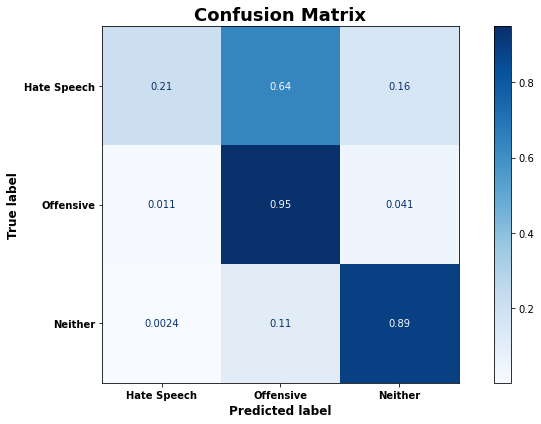

In [82]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_tfidf_acc_grid = fit_grid_clf(mnb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer MNB Tuned for Accuracy',
                       score='accuracy')

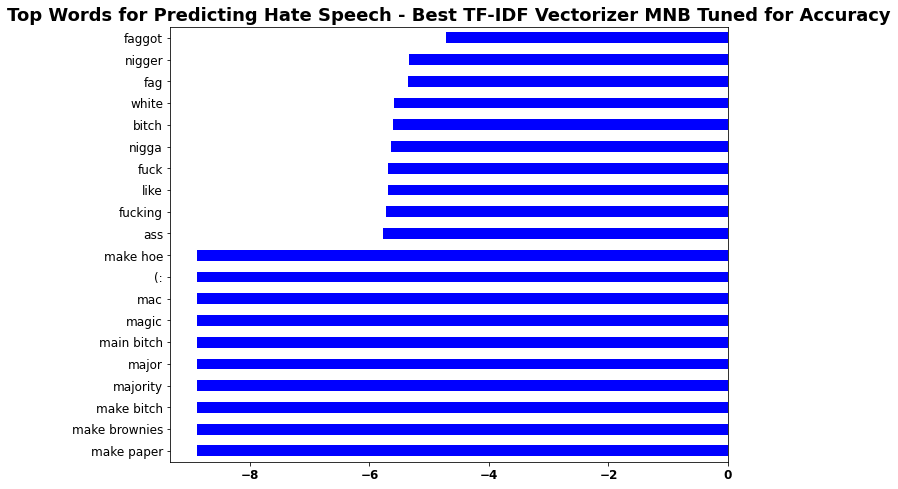

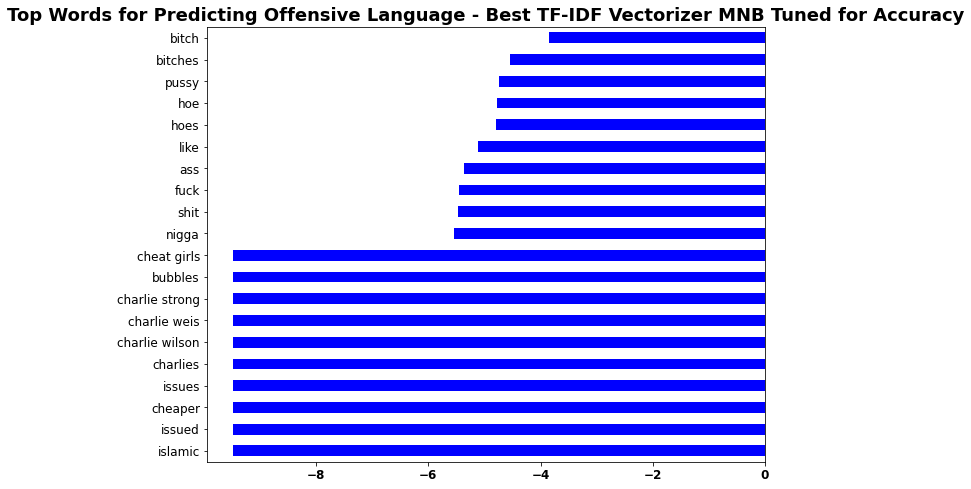

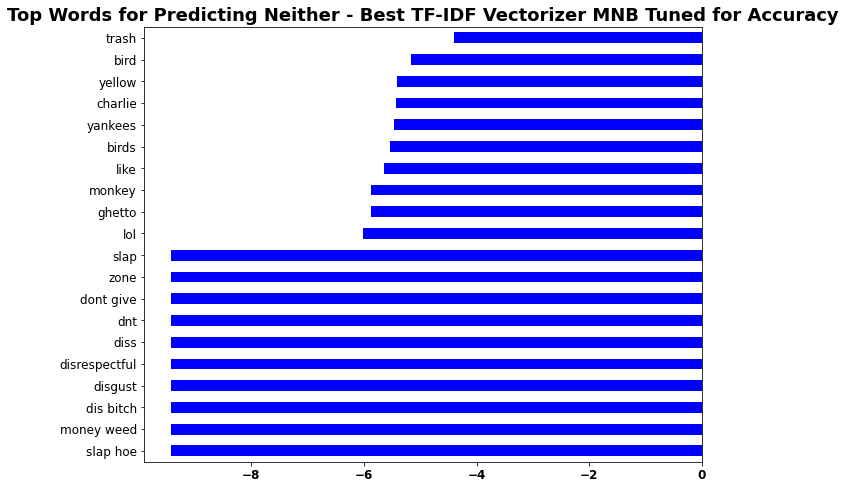

In [83]:
for i in range(0,3):
    plot_coefficients(mnb_tfidf_acc_grid.best_estimator_, 'mnb', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer MNB Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:53:43 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:53:55 PM

***** Total Training Time: 0:00:12.207506


Best Parameters:
{'mnb__alpha': 0.1, 'tfidf_vec__min_df': 3, 'tfidf_vec__ngram_range': (1, 2)}


------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer MNB Tuned for Balanced Accuracy
------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.62      0.35      0.45       286
   Offensive       0.77      0.90      0.83       881
     Neither       0.89      0.87      0.88       833

    accuracy                           0.81      2000
   macro avg       0.76      0.71      0.72      2000
weighted avg       0.80      0.81      0.80      2000

--------------

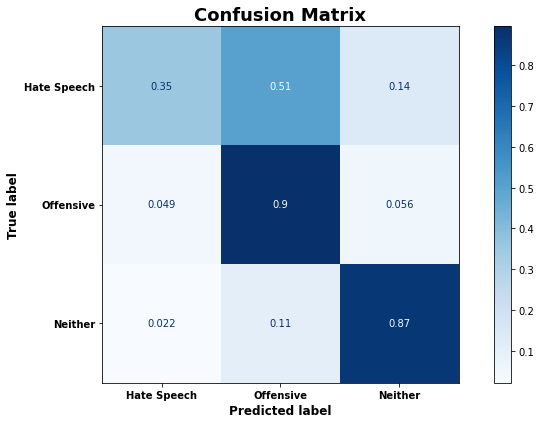

In [84]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'mnb__alpha':[1.0, 1e-1, 1e-2]
         }

## run the grid search to test parameters and find the best estimator 
mnb_tfidf_bacc_grid = fit_grid_clf(mnb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer MNB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

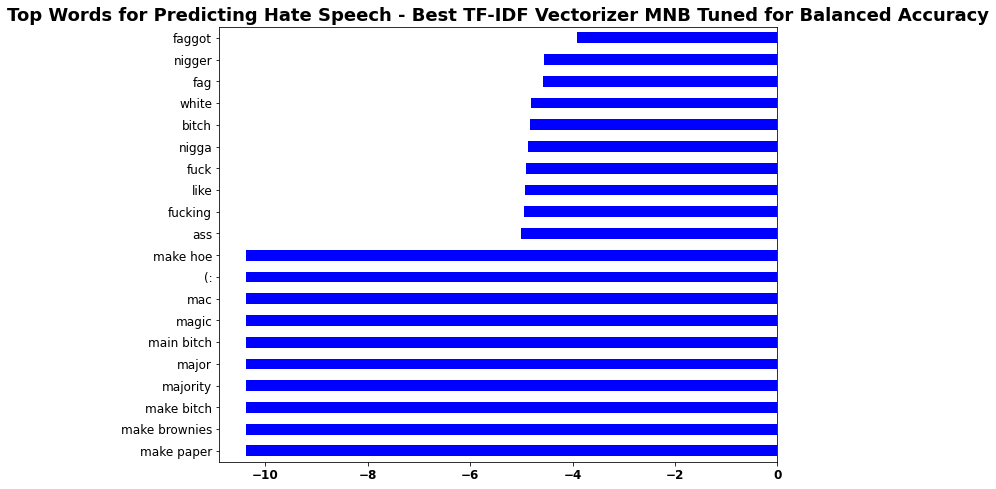

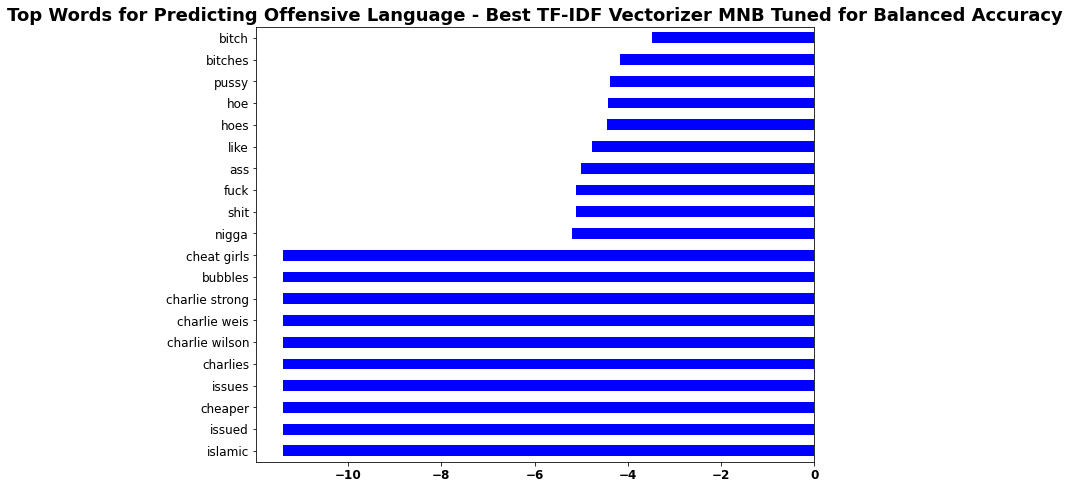

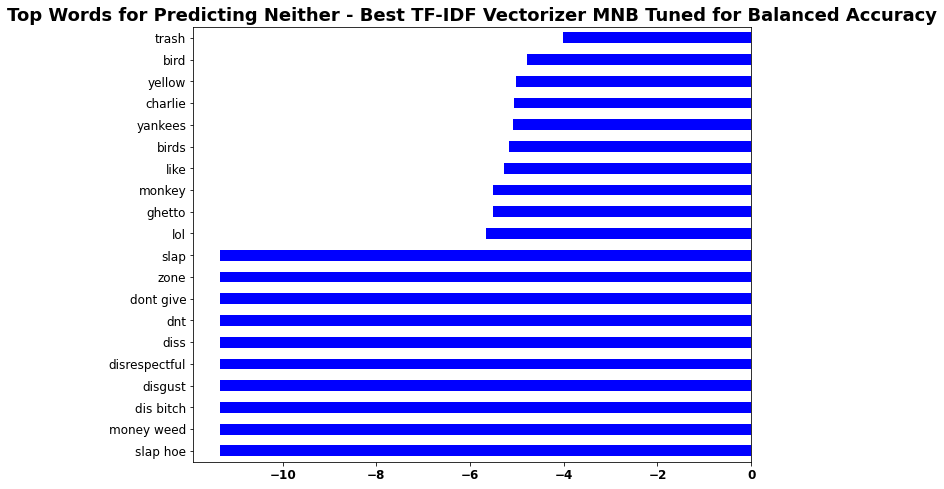

In [85]:
for i in range(0,3):
    plot_coefficients(mnb_tfidf_bacc_grid.best_estimator_, 'mnb', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer MNB Tuned for Balanced Accuracy')

## Hyperparameter Tuning for LinearSVC

### Tuning Count Vectorizer LinearSVC Models

In [86]:
svc_cv_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'count_vec', 'svc', 'count_vec__analyzer', 'count_vec__binary', 'count_vec__decode_error', 'count_vec__dtype', 'count_vec__encoding', 'count_vec__input', 'count_vec__lowercase', 'count_vec__max_df', 'count_vec__max_features', 'count_vec__min_df', 'count_vec__ngram_range', 'count_vec__preprocessor', 'count_vec__stop_words', 'count_vec__strip_accents', 'count_vec__token_pattern', 'count_vec__tokenizer', 'count_vec__vocabulary', 'svc__C', 'svc__class_weight', 'svc__dual', 'svc__fit_intercept', 'svc__intercept_scaling', 'svc__loss', 'svc__max_iter', 'svc__multi_class', 'svc__penalty', 'svc__random_state', 'svc__tol', 'svc__verbose'])

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 21:48:26 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 21:49:30 PM

***** Total Training Time: 0:01:03.222800


Best Parameters:
{'count_vec__min_df': 3, 'count_vec__ngram_range': (1, 3), 'svc__C': 0.1, 'svc__class_weight': None}


--------------------------------------------------------------------------
Classification Report: Best Count Vectorizer LinearSVC Tuned for Accuracy
--------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.71      0.53      0.60       286
   Offensive       0.87      0.89      0.88       881
     Neither       0.90      0.96      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.86      0.86      0.86      2000

---

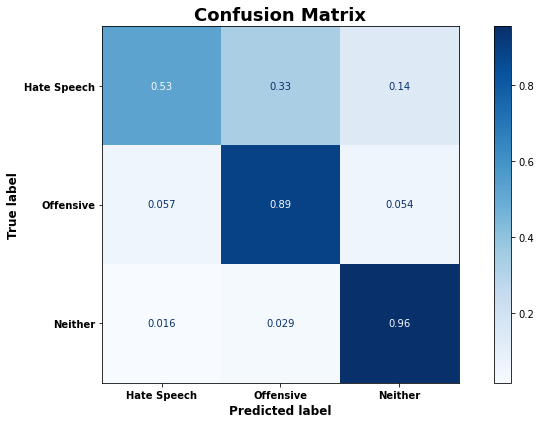

In [135]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_cv_acc_grid = fit_grid_clf(svc_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer LinearSVC Tuned for Accuracy',
                       score='accuracy')

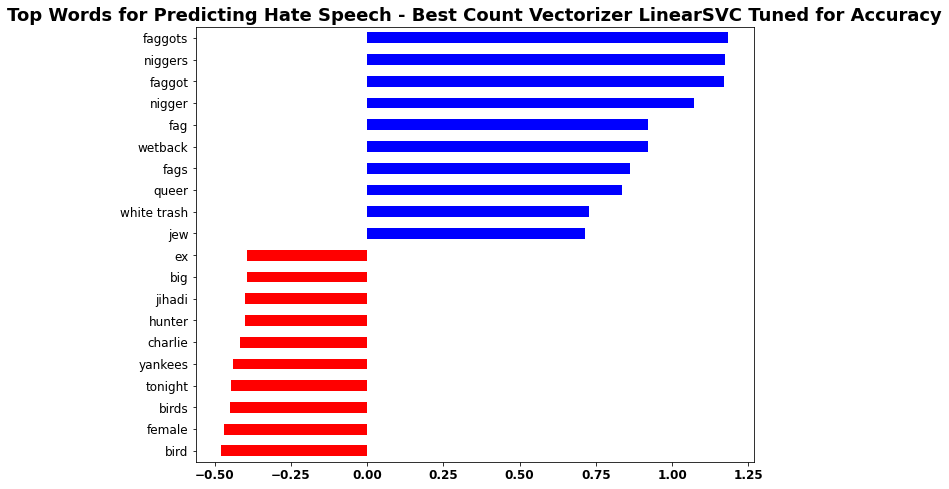

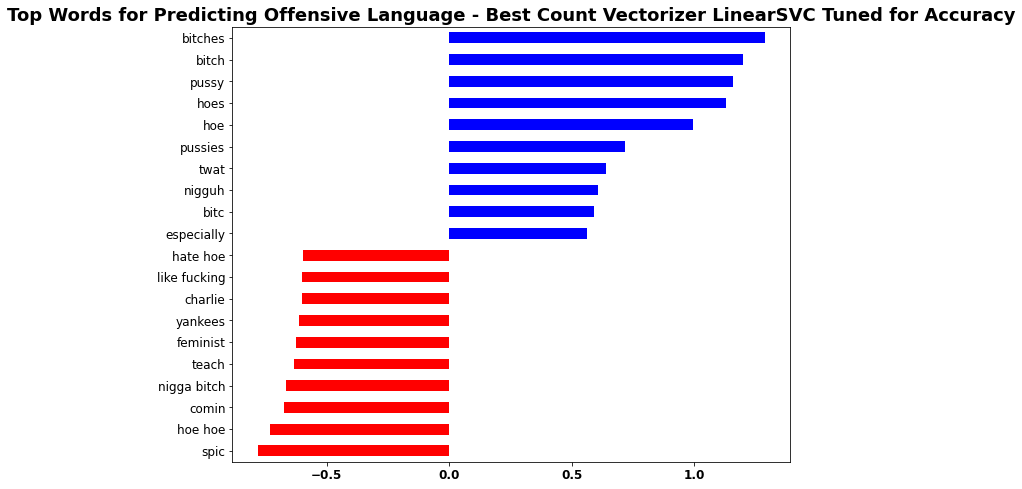

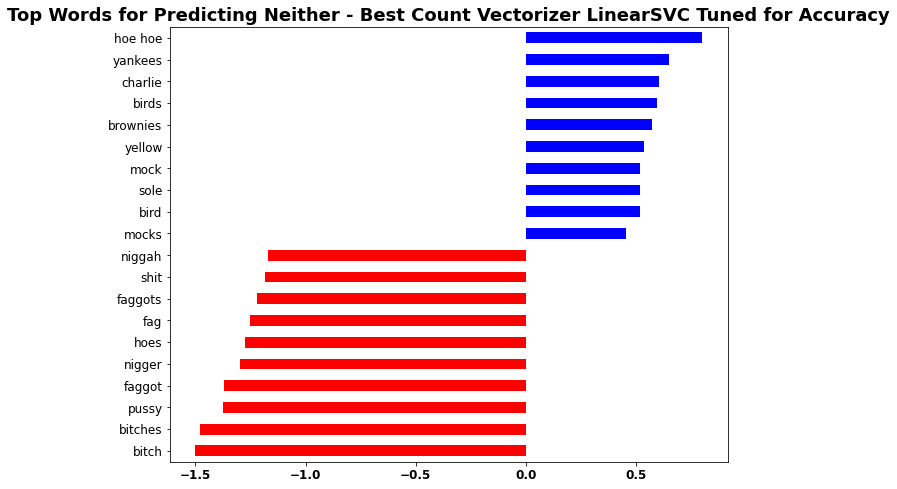

In [88]:
for i in range(0,3):
    plot_coefficients(svc_cv_acc_grid.best_estimator_, 'svc', 'count_vec', i,
                      'Best Count Vectorizer LinearSVC Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:54:48 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:55:37 PM

***** Total Training Time: 0:00:49.788516


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 3), 'svc__C': 0.1, 'svc__class_weight': 'balanced'}


-----------------------------------------------------------------------------------
Classification Report: Best Count Vectorizer LinearSVC Tuned for Balanced Accuracy
-----------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.66      0.63      0.64       286
   Offensive       0.88      0.86      0.87       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.86  

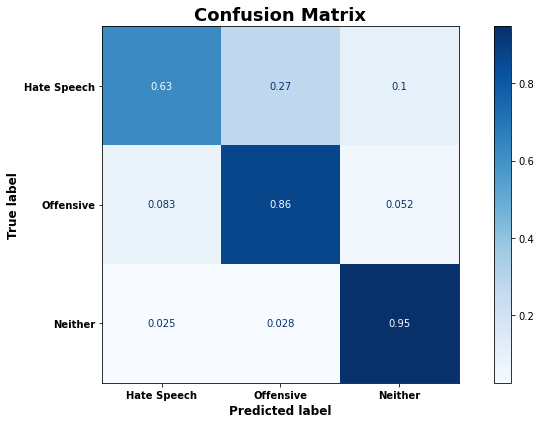

In [89]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'count_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_cv_bacc_grid = fit_grid_clf(svc_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer LinearSVC Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

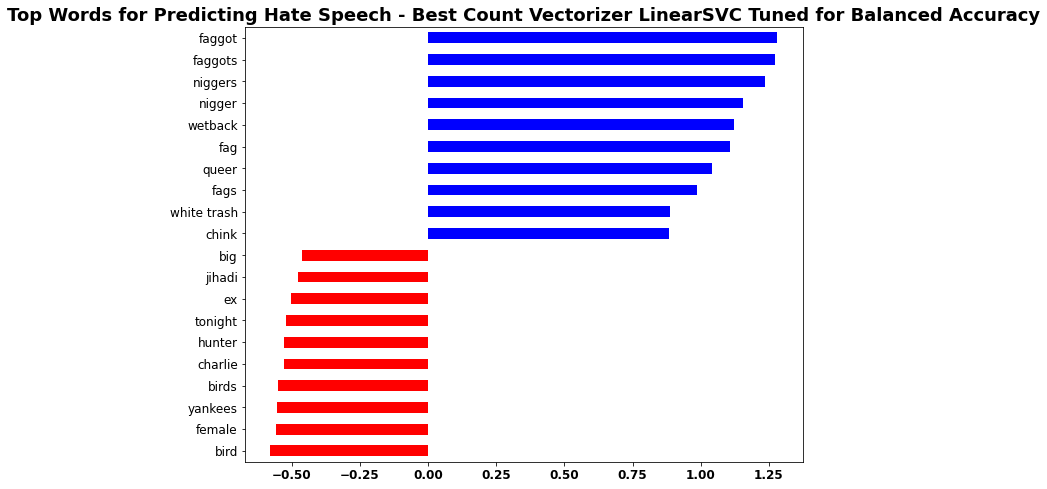

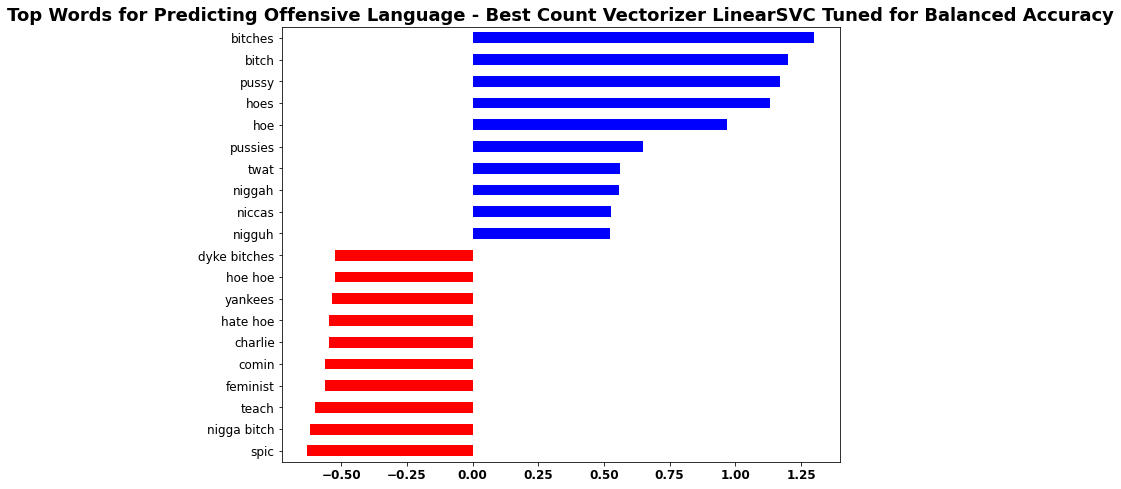

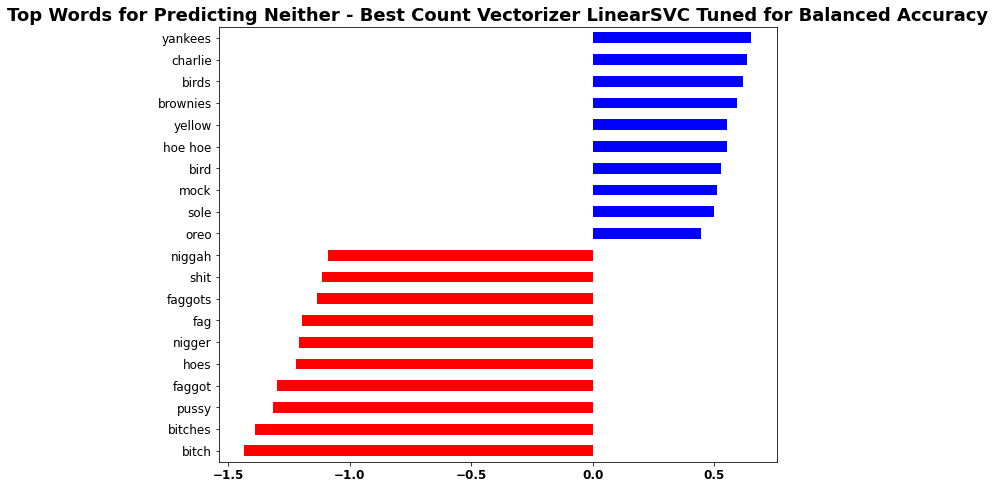

In [90]:
for i in range(0,3):
    plot_coefficients(svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', i,
                      'Best Count Vectorizer LinearSVC Tuned for Balanced Accuracy')

### Tuning TF-IDF Vectorizer LinearSVC Models

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:55:39 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:56:26 PM

***** Total Training Time: 0:00:47.219094


Best Parameters:
{'svc__C': 0.1, 'svc__class_weight': 'balanced', 'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 3)}


---------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer LinearSVC Tuned for Accuracy
---------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.70      0.59      0.64       286
   Offensive       0.89      0.87      0.88       881
     Neither       0.89      0.96      0.92       833

    accuracy                           0.87      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.86      0.87      0.86      

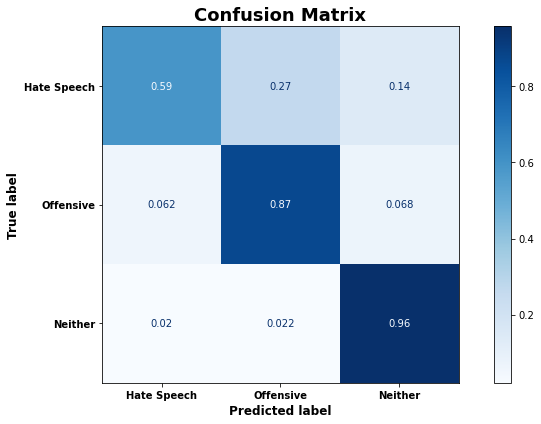

In [91]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_tfidf_acc_grid = fit_grid_clf(svc_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer LinearSVC Tuned for Accuracy',
                       score='accuracy')

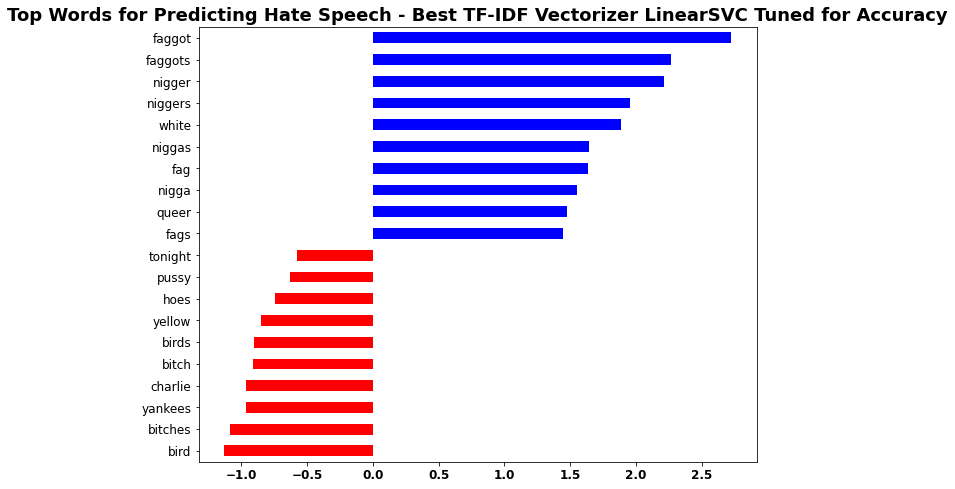

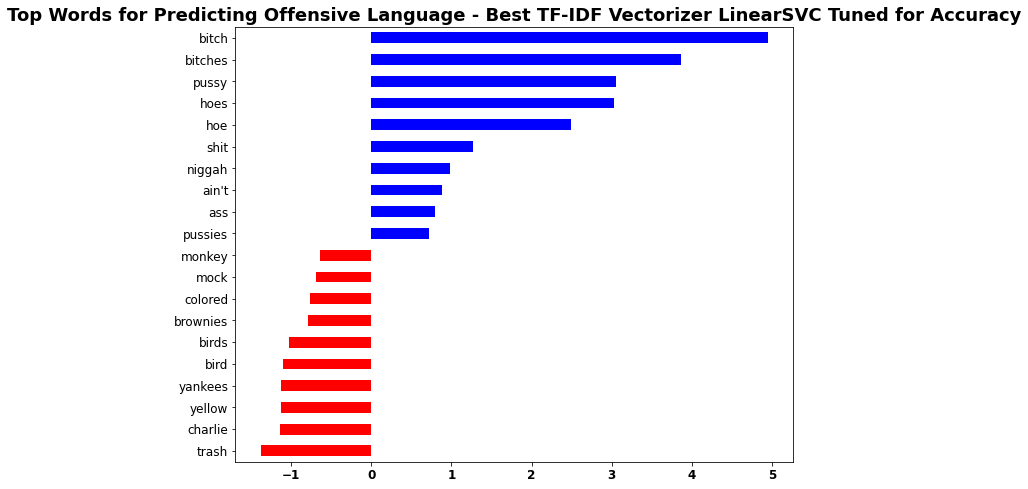

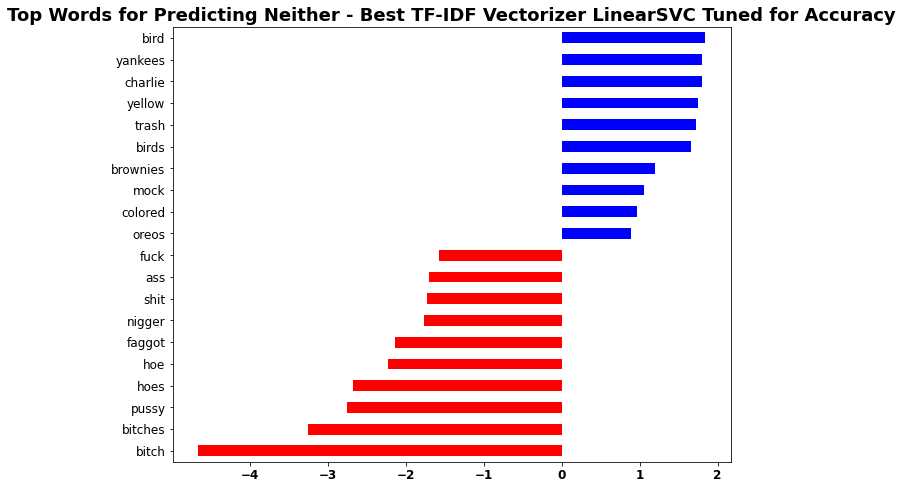

In [92]:
for i in range(0,3):
    plot_coefficients(svc_tfidf_acc_grid.best_estimator_, 'svc', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer LinearSVC Tuned for Accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:56:27 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 19:57:14 PM

***** Total Training Time: 0:00:47.099573


Best Parameters:
{'svc__C': 0.1, 'svc__class_weight': 'balanced', 'tfidf_vec__min_df': 3, 'tfidf_vec__ngram_range': (1, 3)}


------------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer LinearSVC Tuned for Balanced Accuracy
------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.59      0.63       286
   Offensive       0.89      0.86      0.88       881
     Neither       0.89      0.96      0.92       833

    accuracy                           0.86      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.8

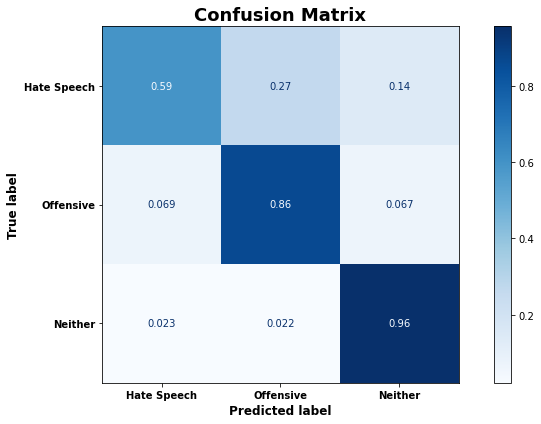

In [93]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2),(1,3)],
          'tfidf_vec__min_df':[0.005, 2, 3],
          'svc__C':[1.0, 10, 100, 0.1, 0.001],
          'svc__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
svc_tfidf_bacc_grid = fit_grid_clf(svc_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer LinearSVC Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

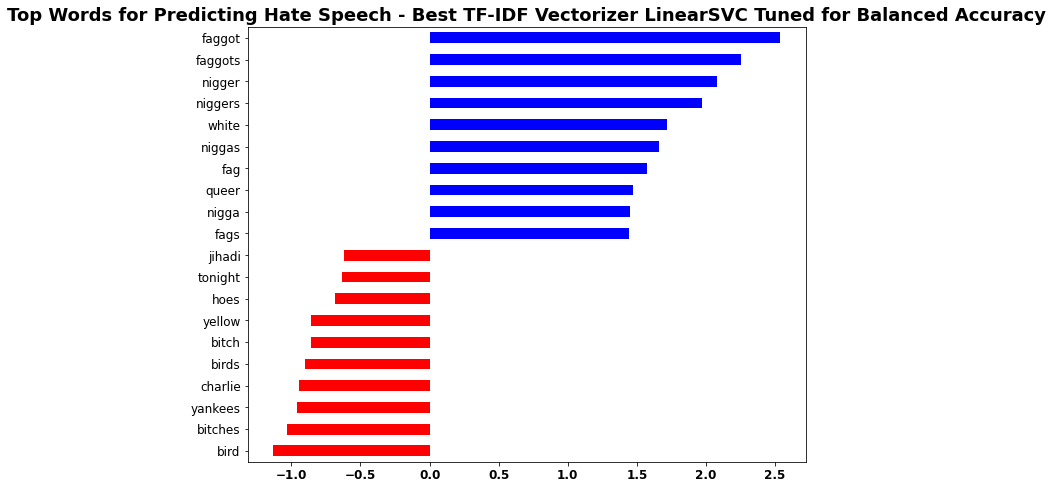

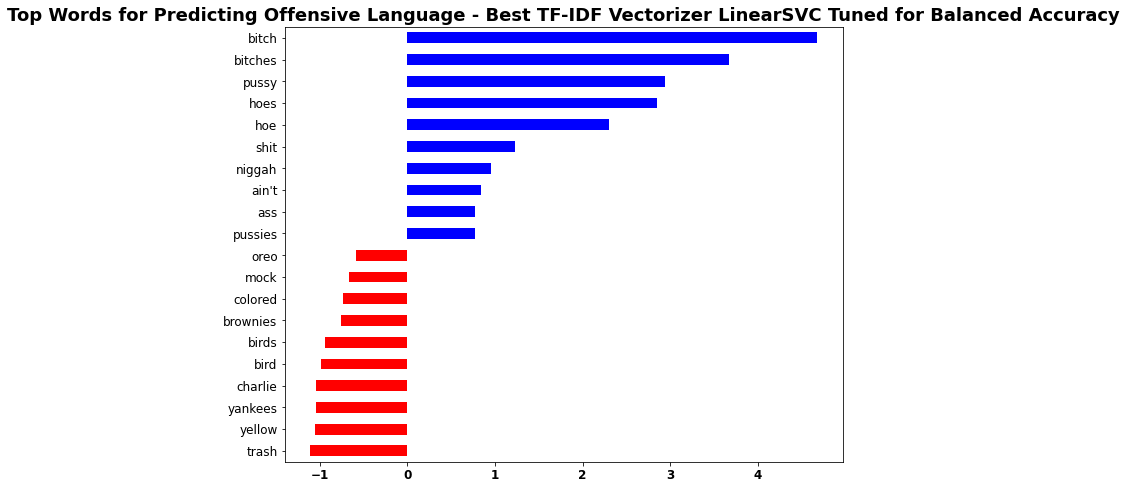

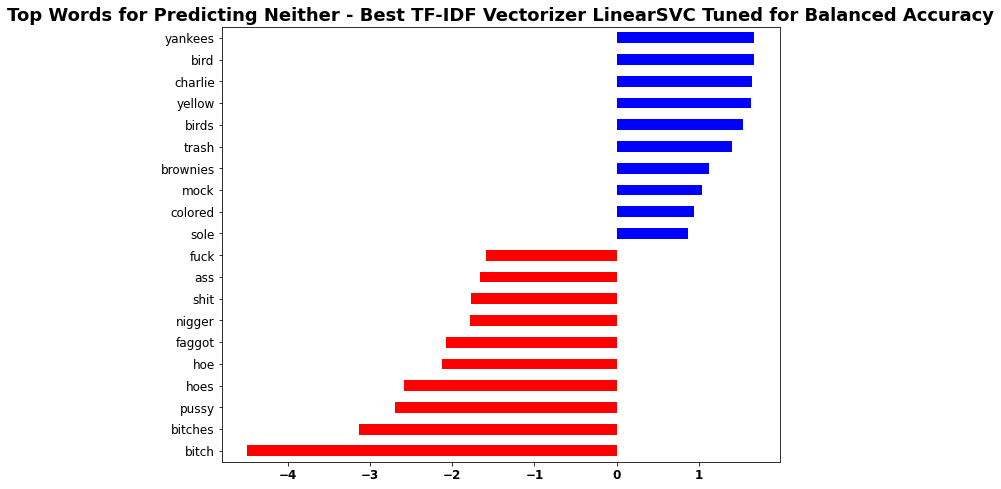

In [94]:
for i in range(0,3):
    plot_coefficients(svc_tfidf_bacc_grid.best_estimator_, 'svc', 'tfidf_vec', i,
                      'Best TF-IDF Vectorizer LinearSVC Tuned for Balanced Accuracy')

## Hyperparameter Tuning for XGB Classifiers

### Tuning Count Vectorizer XGB Models

In [95]:
xgb_cv_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'count_vec', 'svd', 'xgb', 'count_vec__analyzer', 'count_vec__binary', 'count_vec__decode_error', 'count_vec__dtype', 'count_vec__encoding', 'count_vec__input', 'count_vec__lowercase', 'count_vec__max_df', 'count_vec__max_features', 'count_vec__min_df', 'count_vec__ngram_range', 'count_vec__preprocessor', 'count_vec__stop_words', 'count_vec__strip_accents', 'count_vec__token_pattern', 'count_vec__tokenizer', 'count_vec__vocabulary', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__gamma', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight', 'xgb__missing', 'xgb__n_estimators', 'xgb__n_jobs', 'xgb__nthread', 'xgb__objective', 'xgb__random_state', 'xgb__reg_alpha', 'xgb__reg_lambda', 'xgb__scale_pos_weight', 'xgb__seed', 'xgb__silent', 'xgb__subsample', 'xgb__v

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 19:57:16 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 20:05:34 PM

***** Total Training Time: 0:08:18.291553


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 2), 'xgb__colsample_bytree': 0.7, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


--------------------------------------------------------------------
Classification Report: Best Count Vectorizer XGB Tuned for Accuracy
--------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.74      0.40      0.52       286
   Offensive       0.87      0.88      0.87       881
     Neither       0.84      0.97      0.90       833

    accuracy                           0.85      2000
   macro avg       0.82      0.75      0.76      2000
weighted avg       0.84      0.85      0.83 

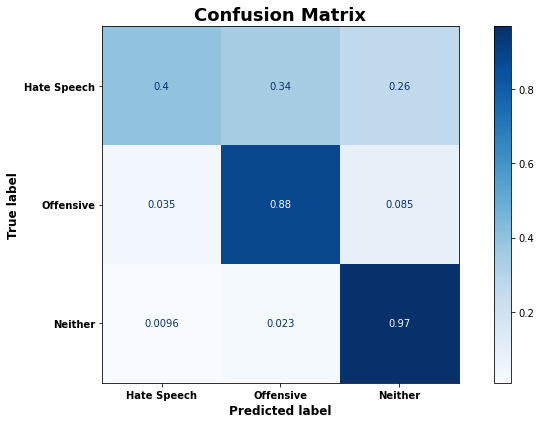

In [96]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_acc_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Accuracy',
                       score='accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 20:05:35 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 20:14:15 PM

***** Total Training Time: 0:08:40.038280


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 1), 'xgb__colsample_bytree': 0.7, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


-----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer XGB Tuned for Balanced Accuracy
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.72      0.42      0.53       286
   Offensive       0.86      0.87      0.87       881
     Neither       0.85      0.96      0.90       833

    accuracy                           0.84      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg     

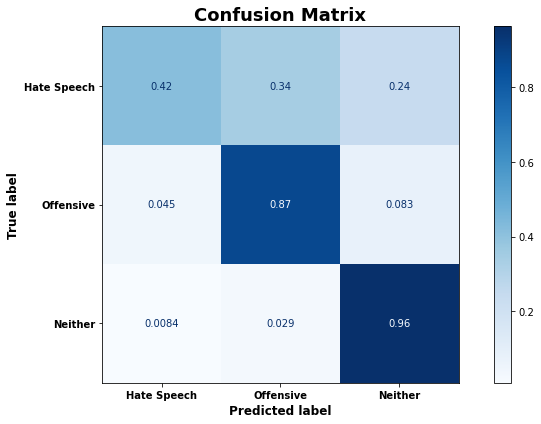

In [97]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_bacc_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

### Tuning TF-IDF Vectorizer XGB Models

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 20:14:16 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 20:22:33 PM

***** Total Training Time: 0:08:17.461522


Best Parameters:
{'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2), 'xgb__colsample_bytree': 1, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


---------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer XGB Tuned for Accuracy
---------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.46      0.55       286
   Offensive       0.86      0.88      0.87       881
     Neither       0.87      0.95      0.91       833

    accuracy                           0.85      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg       0.84      0.85      0.84

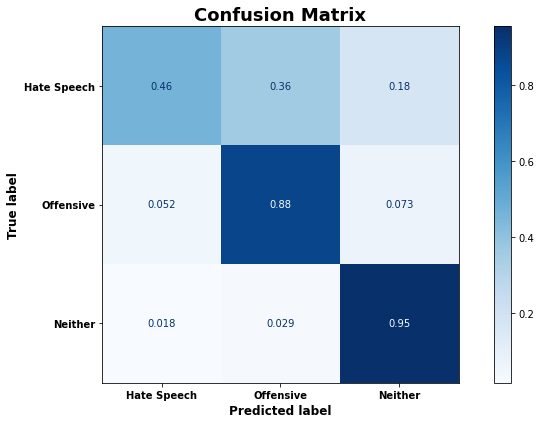

In [98]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_tfidf_acc_grid = fit_grid_clf(xgb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer XGB Tuned for Accuracy',
                       score='accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 20:22:34 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 20:30:47 PM

***** Total Training Time: 0:08:12.954313


Best Parameters:
{'tfidf_vec__min_df': 2, 'tfidf_vec__ngram_range': (1, 2), 'xgb__colsample_bytree': 1, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer XGB Tuned for Balanced Accuracy
------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.68      0.46      0.55       286
   Offensive       0.86      0.88      0.87       881
     Neither       0.87      0.95      0.91       833

    accuracy                           0.85      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg    

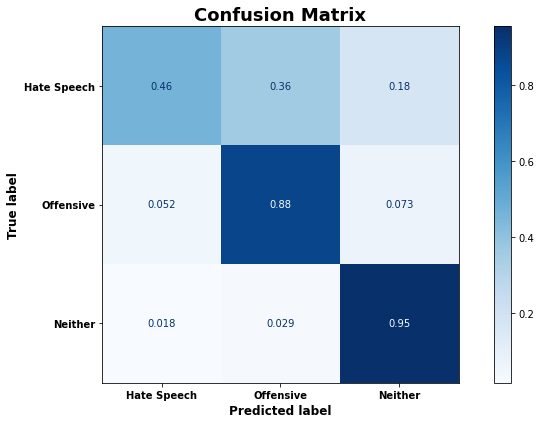

In [99]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[0.005, 2],
          'xgb__max_depth':[3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_tfidf_bacc_grid = fit_grid_clf(xgb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer XGB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

# INTERPRET

## Final Model - Best LinearSVC

---------------------------------------------------------------------------------------
Classification Report: Best Model - Count Vector LinearSVC Tuned for Balanced Accuracy
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.66      0.63      0.64       286
   Offensive       0.88      0.86      0.87       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.86      0.86      0.86      2000

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------




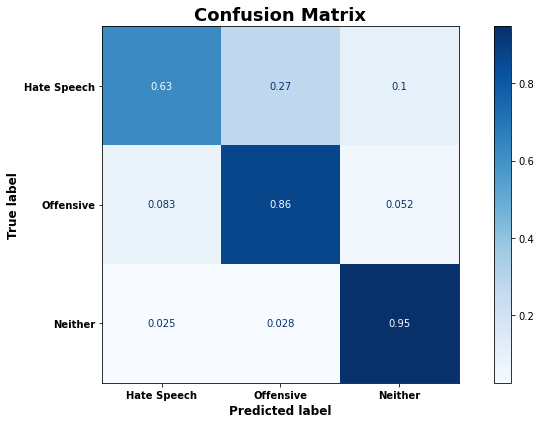

In [131]:
eval_classifier(svc_cv_bacc_grid.best_estimator_, X_test, y_test,
                model_descr='Best Model - Count Vector LinearSVC Tuned for Balanced Accuracy');

In [132]:
svc_cv_bacc_grid.best_params_

{'count_vec__min_df': 2,
 'count_vec__ngram_range': (1, 3),
 'svc__C': 0.1,
 'svc__class_weight': 'balanced'}

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 21:48:09 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 21:48:10 PM

***** Total Training Time: 0:00:01.138318


Best Parameters:
{'count_vec__min_df': 2, 'count_vec__ngram_range': (1, 3), 'svc__C': 0.1, 'svc__class_weight': 'balanced'}


-------------------------------------------------------
Classification Report: Best Model on Lemmatized Data
-------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.65      0.65      0.65       286
   Offensive       0.89      0.86      0.87       881
     Neither       0.91      0.94      0.92       833

    accuracy                           0.86      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.86      0.86      0.86      2000

-------------------------------------------------------


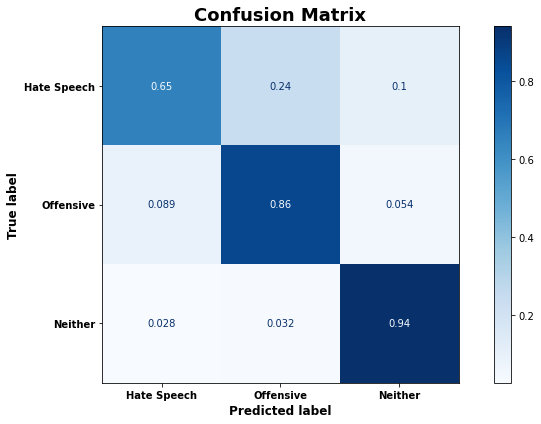

In [134]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__min_df': [2],
          'count_vec__ngram_range': [(1, 3)],
          'svc__C': [0.1],
          'svc__class_weight': ['balanced']}

## run the grid search to test parameters and find the best estimator 
lemma_svc_cv_bacc_grid = fit_grid_clf(svc_cv_pipe, params, 
                       X_lemma_train, y_lemma_train,
                       X_lemma_test, y_lemma_test,
                       model_descr='Best Model on Lemmatized Data',
                       score='balanced_accuracy')

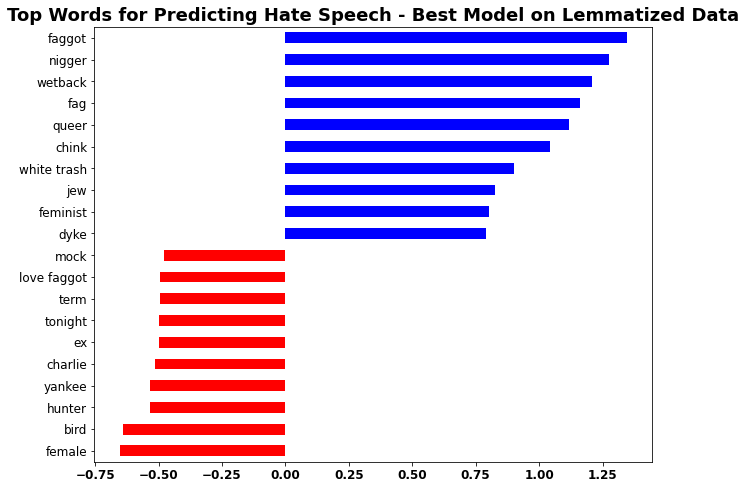

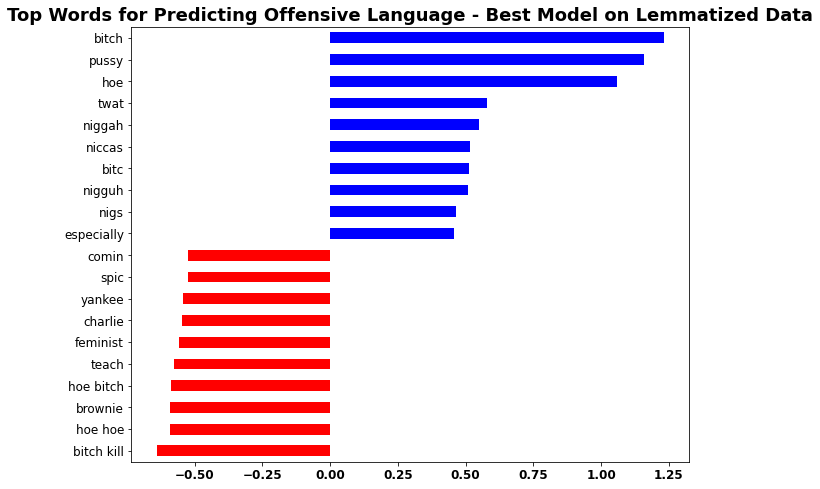

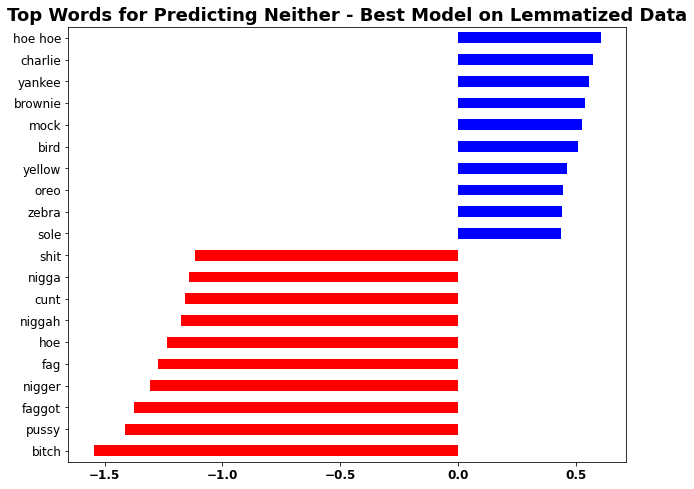

In [136]:
for i in range(0,3):
    plot_coefficients(lemma_svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', i,
                      'Best Model on Lemmatized Data')

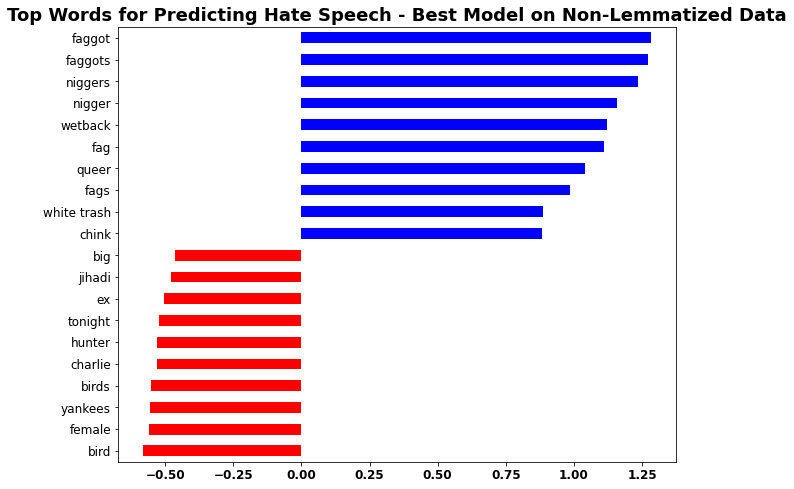

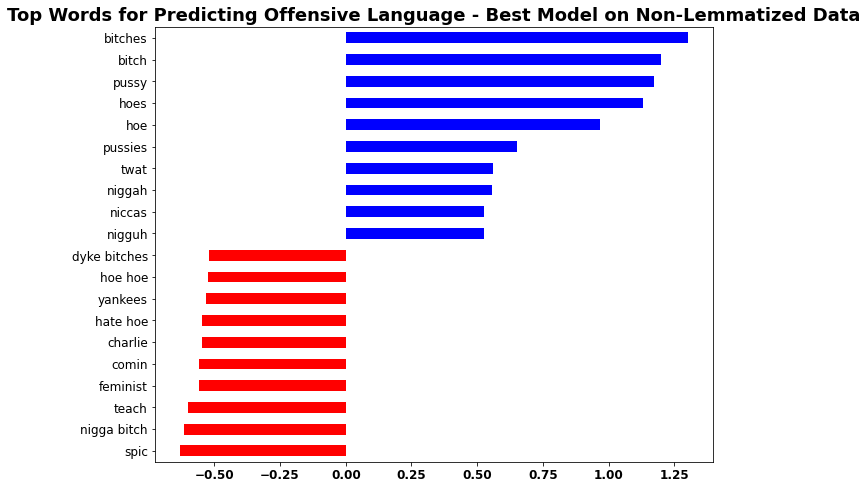

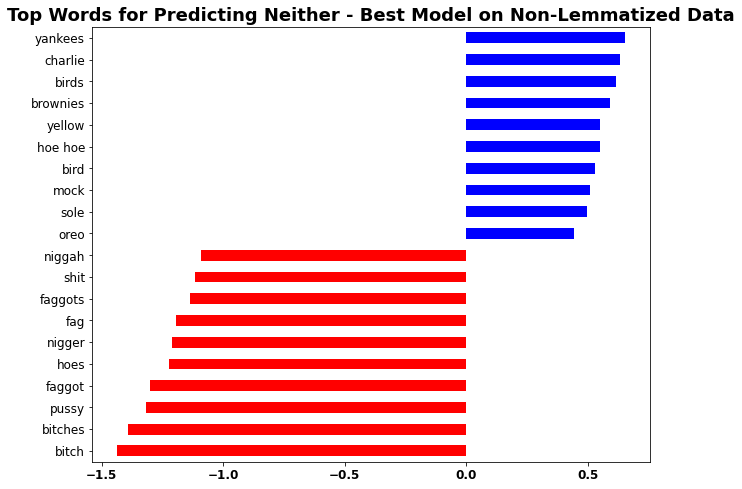

In [137]:
for i in range(0,3):
    plot_coefficients(svc_cv_bacc_grid.best_estimator_, 'svc', 'count_vec', i,
                      'Best Model on Non-Lemmatized Data')

# Conclusions/Recommendations